# MONITORING POPULATION

**CALCULATING POPULATION STABILITY INDEX**

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
import os
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To display all columns name
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [ ]:
loan_data_inputs_train_backup = pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train_backup = pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_targets_train.csv', index_col=0)#
loan_data_inputs_test_backup = pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test_backup =  pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_targets_test.csv', index_col=0)#, header=None
print(loan_data_inputs_train_backup.shape)
print(loan_data_inputs_test_backup.shape)
print(loan_data_targets_train_backup.shape)
print(loan_data_targets_test_backup.shape)

In [ ]:
#We make a copy of our file
loan_data_inputs_train = loan_data_inputs_train_backup.copy()
loan_data_targets_train = loan_data_targets_train_backup.copy() 
loan_data_inputs_test = loan_data_inputs_test_backup.copy()
loan_data_targets_test = loan_data_targets_test_backup.copy()

In [3]:
path = r"D:\DataBases\DataSets\Credit_Risk_Modeling"
#load 2015 new data set
loan_data_backup = pd.read_csv(path + '\loan_data_2015.csv')
loan_data = loan_data_backup.copy()
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

**1.1 Preprocess all continuous varaibles into numerical values**

In [5]:

loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [6]:
#STR method to search a string and replace it by another string
#The sequence of replacement is important
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("< 1 year", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("n/a", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" year", "")

In [7]:
#The variable still appear as string
type(loan_data["emp_length_int"][1])

str

In [8]:
#To transform a string into a numeric column
loan_data["emp_length_int"] = pd.to_numeric(loan_data["emp_length_int"])
type(loan_data["emp_length_int"][20])

numpy.float64

In [9]:
loan_data["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [10]:
#Replace months by empty space
loan_data["term_int"] = loan_data["term"].str.replace(" months", "")
loan_data["term_int"] = loan_data["term_int"].str.replace(" months", "")

In [11]:
#Convert string to numerical data
loan_data["term_int"] = pd.to_numeric(loan_data["term_int"])
type(loan_data["term_int"][1])

numpy.int64

In [12]:
#We have to calculate the time that has passed since the 1st credit line was issued
#We must convert these string into timestamps 
loan_data["earliest_cr_line"]

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [13]:
#To turn a string into a timestamps
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line"], format = "%b-%y")

In [14]:
#We know the date of the earliest credit line
#We need the time since the earliest credit line was issued for the model
#We need a reference date in order to calculate the time that has passed since the 1st credit line was issued.
#eg: let's consider 2018-12-01 as the reference date 
pd.to_datetime("2018-12-01") - loan_data["earliest_cr_line_date"] 

0        10530 days
1         6362 days
2         2710 days
3         7305 days
4         6696 days
            ...    
421089    5204 days
421090   16346 days
421091    5570 days
421092    5540 days
421093    6209 days
Name: earliest_cr_line_date, Length: 421094, dtype: timedelta64[ns]

In [15]:
#To convert the variable "mths_since_earliest_cr_line" into Months
loan_data["mths_since_earliest_cr_line"] = round(pd.to_numeric((pd.to_datetime("2018-12-01") -\
                                                                loan_data["earliest_cr_line_date"])/np.timedelta64(1, "M")))

In [16]:
loan_data["mths_since_earliest_cr_line"]

0         346.0
1         209.0
2          89.0
3         240.0
4         220.0
          ...  
421089    171.0
421090    537.0
421091    183.0
421092    182.0
421093    204.0
Name: mths_since_earliest_cr_line, Length: 421094, dtype: float64

In [17]:
loan_data["mths_since_earliest_cr_line"].describe()

count    421094.000000
mean        239.354876
std          98.123989
min        -600.000000
25%         179.000000
50%         224.000000
75%         289.000000
max         599.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [18]:
#the minimum is negative, We have to further investigate the data
loan_data.loc[:, ["earliest_cr_line", "earliest_cr_line_date","mths_since_earliest_cr_line"]][loan_data["mths_since_earliest_cr_line"] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
254,Jan-57,2057-01-01,-457.0
618,Aug-64,2064-08-01,-548.0
648,Jul-68,2068-07-01,-595.0
1808,Jan-65,2065-01-01,-553.0
2583,Sep-64,2064-09-01,-549.0
...,...,...,...
418890,Jun-68,2068-06-01,-594.0
420450,Jan-66,2066-01-01,-565.0
420642,Sep-68,2068-09-01,-597.0
420794,Sep-65,2065-09-01,-561.0


In [19]:
#The min time of the time since earliest cr was issued is negative 
#To correct we repalce all the negative values with the maximum observed normal value
loan_data["mths_since_earliest_cr_line"][loan_data["mths_since_earliest_cr_line"] < 0] = \
loan_data["mths_since_earliest_cr_line"].max() 

In [20]:
min(loan_data["mths_since_earliest_cr_line"])

73.0

In [21]:
loan_data["term_int"].describe()

count    421094.000000
mean         43.860782
std          11.263533
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [22]:
#We engineer the variable issue date
#The variable is on the %b-%y
loan_data["issue_d"]

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [23]:
#To turn a string into a timestamps
loan_data['issue_date'] = pd.to_datetime(loan_data["issue_d"], format = "%b-%y")

In [24]:
#Consider today is 2018-12-01
pd.to_datetime("2019-12-01") - loan_data["issue_date"]

0        1461 days
1        1461 days
2        1461 days
3        1461 days
4        1461 days
            ...   
421089   1795 days
421090   1795 days
421091   1795 days
421092   1795 days
421093   1795 days
Name: issue_date, Length: 421094, dtype: timedelta64[ns]

In [25]:
loan_data["mths_since_issue_date"] = round(pd.to_numeric((pd.to_datetime("2019-12-01") - loan_data["issue_date"]) / np.timedelta64(1, "M")))
loan_data["mths_since_issue_date"].describe()

count    421094.000000
mean         53.044629
std           3.458162
min          48.000000
25%          50.000000
50%          53.000000
75%          56.000000
max          59.000000
Name: mths_since_issue_date, dtype: float64

**1.2 We create categorical variables**

In [ ]:
#We will creat discrete categorical varaibles for the variables
#"grade"
#"sub_grade"
#"home_ownership"
#"verification_status"
#"loan_status"
#"purpose"
#"initial_list_status"

In [26]:
loan_data["addr_state"].unique() 

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [27]:
loan_data_dummies =[pd.get_dummies(loan_data["grade"], prefix = "grade", prefix_sep = ":"), 
                    pd.get_dummies(loan_data["sub_grade"], prefix = "sub_grade", prefix_sep = ":"),
                    pd.get_dummies(loan_data["home_ownership"], prefix = "home_ownership", prefix_sep = ":"),
                    pd.get_dummies(loan_data["verification_status"], prefix = "verification_status", prefix_sep = ":"),
                    pd.get_dummies(loan_data["loan_status"], prefix = "loan_status", prefix_sep = ":"),
                    pd.get_dummies(loan_data["purpose"], prefix = "purpose", prefix_sep = ":"),
                    pd.get_dummies(loan_data["addr_state"], prefix = "addr_state", prefix_sep = ":"),
                    pd.get_dummies(loan_data["initial_list_status"], prefix = "initial_list_status", prefix_sep = ":")]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [28]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [29]:
#the feature 'total_rev_hi_lim' has "70276" missing values
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
# We fill the missing values with the values of another variable.

In [30]:
#To check if we still heve missing values
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [31]:
# We fill the missing values with the mean value of the non-missing values.
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [32]:
# We fill the missing values with zeroes.
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [33]:
#We check unique features
loan_data["loan_status"].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [35]:
#We count the number of observation for each unique features of our dependent variable
loan_data["loan_status"].value_counts(normalize=True)

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [36]:
#We will define 1=good loan and 0=bad loan;
#Where: check if a condition is true, return a specified value if a condition is true or another if the condition is false
#isin:check wheter a value is in alist of value
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(["Charged Off","Default ",
                                                               "Does not meet the credit policy. Status:Charged Off",
                                                               "Late (16-30 days)"]), 0, 1)

In [37]:
#Create dummies variables for continuous variables.to convey continuous variables into categories: Find Classing,
#weight of evidence method shows the extent to which the different categories of an independent variable explains a dependent variable 
#Coarse Classing: Process on constructing new categories based on initial ones
#Information value:
loan_data["good_bad"]

0         1
1         1
2         1
3         1
4         1
         ..
421089    1
421090    1
421091    1
421092    1
421093    1
Name: good_bad, Length: 421094, dtype: int32

In [39]:
loan_data["good_bad"].unique()

array([1, 0])

In [40]:
df_inputs_prep = loan_data.drop("good_bad", axis=1)
df_targets_prep = loan_data["good_bad"]
#df_inputs_prep = loan_data_inputs_test
#df_targets_prep = loan_data_targets_test

In [41]:
print(df_inputs_prep.shape)
print(df_targets_prep.shape)

(421094, 202)
(421094,)


In [42]:
df_inputs_prep["grade"].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [43]:
df1 = pd.concat([df_inputs_prep["grade"], df_targets_prep], axis = 1)
df1.head()

,grade,good_bad
0,C,1
1,A,1
2,C,1
3,C,1
4,B,1


In [44]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


In [45]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.997736
1,B,0.995553
2,C,0.991374
3,D,0.983672
4,E,0.978797
5,F,0.966487
6,G,0.958468


In [46]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis = 1)

In [47]:
df1

,grade,good_bad,grade,good_bad
0,A,73335,A,0.997736
1,B,117606,B,0.995553
2,C,120567,C,0.991374
3,D,62654,D,0.983672
4,E,34948,E,0.978797
5,F,9817,F,0.966487
6,G,2167,G,0.958468


In [48]:
df1 = df1.iloc[:, [0, 1, 3]]

In [49]:
df1.columns = [df1.columns.values[0], "n_obs", "prop_good"]
df1

,grade,n_obs,prop_good
0,A,73335,0.997736
1,B,117606,0.995553
2,C,120567,0.991374
3,D,62654,0.983672
4,E,34948,0.978797
5,F,9817,0.966487
6,G,2167,0.958468


In [50]:
#We calculate weight of evidence and information value
#1.Proportion of observation that fall into each Grade= nber of info in each rows/ by the sum of nber of observation in each row
df1["prop_n_obs"] = df1["n_obs"] / df1["n_obs"].sum()
#2.Number of Good borrowers by Grade group
df1["n_good"] = df1["prop_good"] * df1["n_obs"]

In [51]:
#3.Number of Bad borrower = prop of bad borrower times nber of observation of respective grade 
#df1["n_bad"] = (1 - df1["prop_good"] * df1["n_obs"] 
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs'] 

In [52]:
#4.prop of god borrowers for each grade
df1["prop_n_good"] = df1["n_good"] / df1["n_good"].sum()
#5.prop of bad borrowers for each grade
df1["prop_n_bad"] = df1["n_bad"] / df1["n_bad"].sum()
df1  

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,73335,0.997736,0.174154,73169.0,166.0,0.175389,0.042434
1,B,117606,0.995553,0.279287,117083.0,523.0,0.280652,0.133691
2,C,120567,0.991374,0.286318,119527.0,1040.0,0.286510,0.265849
3,D,62654,0.983672,0.148789,61631.0,1023.0,0.147732,0.261503
4,E,34948,0.978797,0.082993,34207.0,741.0,0.081995,0.189417
5,F,9817,0.966487,0.023313,9488.0,329.0,0.022743,0.084100
6,G,2167,0.958468,0.005146,2077.0,90.0,0.004979,0.023006


In [53]:
#Weight of Evidence of the variable grade
# We take the natural logarithm of a variable and save the result in a nex variable.
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE']) # Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True) # We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2167,0.958468,0.005146,2077.0,90.0,0.004979,0.023006,-1.530604
1,F,9817,0.966487,0.023313,9488.0,329.0,0.022743,0.084100,-1.307748
2,E,34948,0.978797,0.082993,34207.0,741.0,0.081995,0.189417,-0.837289
3,D,62654,0.983672,0.148789,61631.0,1023.0,0.147732,0.261503,-0.571048
4,C,120567,0.991374,0.286318,119527.0,1040.0,0.286510,0.265849,0.074848
5,B,117606,0.995553,0.279287,117083.0,523.0,0.280652,0.133691,0.741583
6,A,73335,0.997736,0.174154,73169.0,166.0,0.175389,0.042434,1.419065


In [54]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.

In [55]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.958468,0.005146,2077.0,90.0,0.004979,0.023006,-1.530604,NaN,NaN,0.561947
1,F,9817,0.966487,0.023313,9488.0,329.0,0.022743,0.084100,-1.307748,0.008019,0.222855,0.561947
2,E,34948,0.978797,0.082993,34207.0,741.0,0.081995,0.189417,-0.837289,0.012310,0.470460,0.561947
3,D,62654,0.983672,0.148789,61631.0,1023.0,0.147732,0.261503,-0.571048,0.004875,0.266241,0.561947
4,C,120567,0.991374,0.286318,119527.0,1040.0,0.286510,0.265849,0.074848,0.007702,0.645896,0.561947
5,B,117606,0.995553,0.279287,117083.0,523.0,0.280652,0.133691,0.741583,0.004179,0.666735,0.561947
6,A,73335,0.997736,0.174154,73169.0,166.0,0.175389,0.042434,1.419065,0.002183,0.677482,0.561947


In [56]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [57]:
# We test the function with 'grade', the 1st argument= dataframe, 2nd=the categorical variable of interest, 3rd= dependent variable
df_temp = woe_discrete(df_inputs_prep, 'grade', df_targets_prep)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.958468,0.005146,2077.0,90.0,0.004979,0.023006,-1.530604,NaN,NaN,0.561947
1,F,9817,0.966487,0.023313,9488.0,329.0,0.022743,0.084100,-1.307748,0.008019,0.222855,0.561947
2,E,34948,0.978797,0.082993,34207.0,741.0,0.081995,0.189417,-0.837289,0.012310,0.470460,0.561947
3,D,62654,0.983672,0.148789,61631.0,1023.0,0.147732,0.261503,-0.571048,0.004875,0.266241,0.561947
4,C,120567,0.991374,0.286318,119527.0,1040.0,0.286510,0.265849,0.074848,0.007702,0.645896,0.561947
5,B,117606,0.995553,0.279287,117083.0,523.0,0.280652,0.133691,0.741583,0.004179,0.666735,0.561947
6,A,73335,0.997736,0.174154,73169.0,166.0,0.175389,0.042434,1.419065,0.002183,0.677482,0.561947


In [58]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

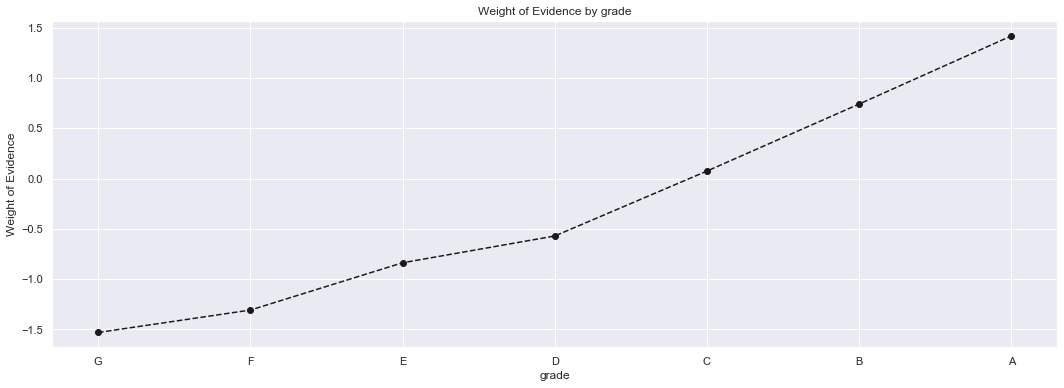

In [59]:
#We plot WoE of the variable "grade"
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

In [60]:
#Calculate the WoE for others discrete categorical variables and plot respectively for:
#
#home_ownership,
#sub_grade, 
#verification_status,
#loan_status,
#purpose,
#addr_state
#initial_list_status
df_temp = woe_discrete(df_inputs_prep,"addr_state" ,df_targets_prep)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,UT,2836,0.986601,0.006735,2798.0,38.0,0.006707,0.009714,-0.370400,NaN,NaN,inf
1,WY,900,0.986667,0.002137,888.0,12.0,0.002129,0.003067,-0.365409,0.000066,0.004991,inf
2,HI,2083,0.987038,0.004947,2056.0,27.0,0.004928,0.006902,-0.336793,0.000371,0.028616,inf
3,AL,5347,0.987096,0.012698,5278.0,69.0,0.012652,0.017638,-0.332278,0.000058,0.004515,inf
4,OK,3968,0.987147,0.009423,3917.0,51.0,0.009389,0.013037,-0.328218,0.000052,0.004060,inf
5,NV,5924,0.987171,0.014068,5848.0,76.0,0.014018,0.019427,-0.326352,0.000024,0.001866,inf
6,VA,12033,0.987784,0.028576,11886.0,147.0,0.028491,0.037577,-0.276790,0.000613,0.049562,inf
7,KS,3736,0.988758,0.008872,3694.0,42.0,0.008855,0.010736,-0.192678,0.000974,0.084112,inf
8,MN,7799,0.989486,0.018521,7717.0,82.0,0.018498,0.020961,-0.125012,0.000728,0.067666,inf
9,AK,954,0.989518,0.002266,944.0,10.0,0.002263,0.002556,-0.121933,0.000032,0.003079,inf


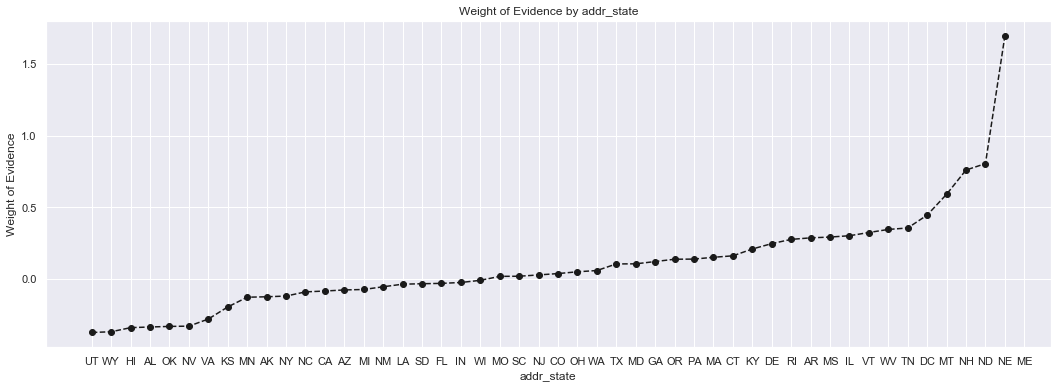

In [61]:
plot_by_woe(df_temp)

In [62]:
df_inputs_prep["addr_state"].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [65]:
len(df_inputs_prep["addr_state"].unique())

49

In [66]:
#We have onlu 49 categories, however the us has 51 states. the state Iowa(IA) and Idaho(ID) is missing
#We will create a dummy variable for IA and ID
#We create a function that will create a dummy for IA if there isn't any all set all its values to 0.do nothing if there is. 
if ['addr_state:IA'] in df_inputs_prep.columns.values:
    pass
else:
    df_inputs_prep['addr_state:IA'] = 0

In [67]:
if ['addr_state:ID'] in df_inputs_prep.columns.values:
    pass
else:
    df_inputs_prep['addr_state:ID'] = 0

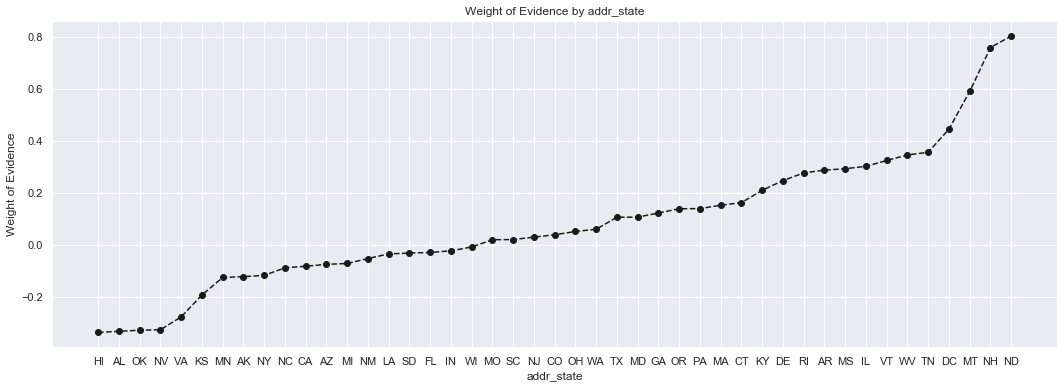

In [70]:
plot_by_woe(df_temp.iloc[2: -2, :])

In [ ]:
#Similarly the state with the highest WoE acn be group together based on their low nber of obs 
# DC, WY, NH, WV will be combined with "ME, ID" 
# The Best category will include "DC, WY, NH, WV,ME, ID"

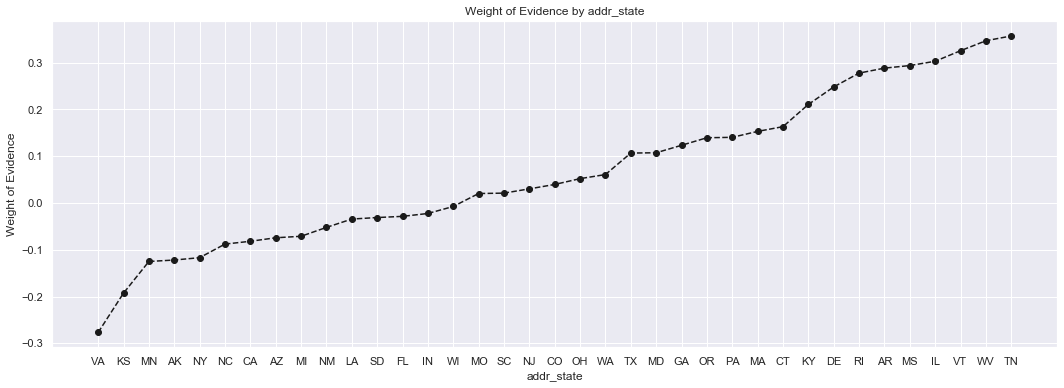

In [71]:
#We plot the graph excluding the 1st 6 and Last 6rows.
plot_by_woe(df_temp.iloc[6: -6, :])

In [72]:
df_temp["addr_state"]

0     UT
1     WY
2     HI
3     AL
4     OK
5     NV
6     VA
7     KS
8     MN
9     AK
10    NY
11    NC
12    CA
13    AZ
14    MI
15    NM
16    LA
17    SD
18    FL
19    IN
20    WI
21    MO
22    SC
23    NJ
24    CO
25    OH
26    WA
27    TX
28    MD
29    GA
30    OR
31    PA
32    MA
33    CT
34    KY
35    DE
36    RI
37    AR
38    MS
39    IL
40    VT
41    WV
42    TN
43    DC
44    MT
45    NH
46    ND
47    NE
48    ME
Name: addr_state, dtype: object

In [73]:
#"ND, NE, IA, NV, FL, AL, HI"
df_inputs_prep['addr_state:ND_NE_IA_NV_FL_AL_HI'] = sum([df_inputs_prep['addr_state:ND'], 
                                                         df_inputs_prep['addr_state:NE'],
                                                         df_inputs_prep['addr_state:IA'], 
                                                         df_inputs_prep['addr_state:NV'],
                                                         df_inputs_prep['addr_state:FL'], 
                                                         df_inputs_prep['addr_state:AL'],
                                                         df_inputs_prep['addr_state:HI']])

In [74]:
#"MO, MD"
df_inputs_prep['addr_state:MO_MD'] = sum([df_inputs_prep['addr_state:MO'], 
                                          df_inputs_prep['addr_state:MD']])

In [75]:
#LA, NC,NJ, NM, UT
df_inputs_prep['addr_state:LA_NC_NJ_NM_UT'] = sum([df_inputs_prep['addr_state:LA'], 
                                                   df_inputs_prep['addr_state:NC'], 
                                                   df_inputs_prep['addr_state:NJ'], 
                                                   df_inputs_prep['addr_state:NM'], 
                                                   df_inputs_prep['addr_state:UT']])

In [76]:
#KY, MI, DE, VA
df_inputs_prep['addr_state:KY_MI_DE_VA'] = sum([df_inputs_prep['addr_state:KY'], 
                                                df_inputs_prep['addr_state:MI'], 
                                                df_inputs_prep['addr_state:DE'], 
                                                df_inputs_prep['addr_state:VA']])

In [77]:
#MN, PA, AZ, AR, WA, TN, OK
df_inputs_prep['addr_state:MN_PA_AZ_AR_WA_TN_OK'] = sum([df_inputs_prep['addr_state:MN'], 
                                                         df_inputs_prep['addr_state:PA'],
                                                         df_inputs_prep['addr_state:AZ'], 
                                                         df_inputs_prep['addr_state:AR'],
                                                         df_inputs_prep['addr_state:WA'], 
                                                         df_inputs_prep['addr_state:TN'],
                                                         df_inputs_prep['addr_state:OK']])

In [78]:
#OH, RI, IN, GA, MA, OR, WI
df_inputs_prep['addr_state:OH_RI_IN_GA_MA_OR_WI'] = sum([df_inputs_prep['addr_state:OH'], 
                                                         df_inputs_prep['addr_state:RI'],
                                                         df_inputs_prep['addr_state:IN'], 
                                                         df_inputs_prep['addr_state:GA'],
                                                         df_inputs_prep['addr_state:MA'], 
                                                         df_inputs_prep['addr_state:OR'],
                                                         df_inputs_prep['addr_state:WI']])

In [79]:
#SD, IL
df_inputs_prep['addr_state:SD_IL'] = sum([df_inputs_prep['addr_state:SD'], 
                                          df_inputs_prep['addr_state:IL']])
#KS, CT
df_inputs_prep['addr_state:KS_CT'] = sum([df_inputs_prep['addr_state:KS'], 
                                          df_inputs_prep['addr_state:CT']])

In [80]:
#CO,MS,SC,AK,VT, MT
df_inputs_prep['addr_state:CO_MS_SC_AK_VT_MT'] = sum([df_inputs_prep['addr_state:CO'], 
                                                      df_inputs_prep['addr_state:MS'], 
                                                      df_inputs_prep['addr_state:SC'], 
                                                      df_inputs_prep['addr_state:AK'], 
                                                      df_inputs_prep['addr_state:VT'],
                                                      df_inputs_prep['addr_state:MT']])

In [81]:
#WV, NH, WY,DC,ME, ID (Best)
df_inputs_prep['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prep['addr_state:WV'], 
                                                      df_inputs_prep['addr_state:NH'], 
                                                      df_inputs_prep['addr_state:WY'], 
                                                      df_inputs_prep['addr_state:DC'], 
                                                      df_inputs_prep['addr_state:ME'], 
                                                      df_inputs_prep['addr_state:ID']])

**2.1 Preprocessing Others Discrete Variables**

In [82]:
df_temp = woe_discrete(df_inputs_prep,"home_ownership" ,df_targets_prep)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,167644,0.988559,0.398115,165726.0,1918.0,0.397251,0.490286,-0.210421,NaN,NaN,inf
1,OWN,45766,0.990801,0.108684,45345.0,421.0,0.108694,0.107618,0.009949,0.002242,0.220370,inf
2,MORTGAGE,207682,0.992426,0.493196,206109.0,1573.0,0.494051,0.402096,0.205947,0.001625,0.195998,inf
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.007574,inf,inf


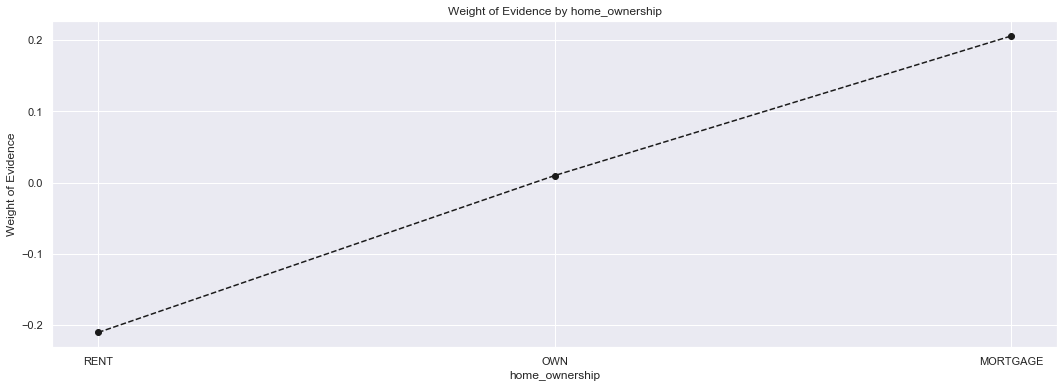

In [83]:
plot_by_woe(df_temp)

In [84]:
#To see unique available home_ownership categories
#we realized that from the variable home_ownership from the old data frame differ from the new(2015) df
# in term of categories OTHER and NONE
#From bus prospective it may indicate population change per say or since there are no OTHER and NONE
#we assume that the bank has much better practices where home_ownership is always recorded
df_inputs_prep["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [87]:
#We combine the categories "Other"&"None" with the category "Rent"
#The dummie "RENT_OTHER_NONE" will be equal to 1 if the borrower has any of the 3 categories and 0 otherwise
#We can achiece this by summing the existing 3 dummies for each of theexisting categories
df_inputs_prep["home_ownership:RENT_OTHER_NONE"] = sum([df_inputs_prep["home_ownership:RENT"]])

In [88]:
#The variables Verification status, purpose of the loan and initial_list_status
#The variable verification_status
df_temp = woe_discrete(df_inputs_prep, 'verification_status', df_targets_prep)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,123016,0.988611,0.292134,121615.0,1401.0,0.291515,0.358129,-0.205800,NaN,NaN,0.039383
1,Source Verified,179565,0.990460,0.426425,177852.0,1713.0,0.426318,0.437883,-0.026768,0.001849,0.179031,0.039383
2,Not Verified,118513,0.993267,0.281441,117715.0,798.0,0.282167,0.203988,0.324439,0.002806,0.351208,0.039383


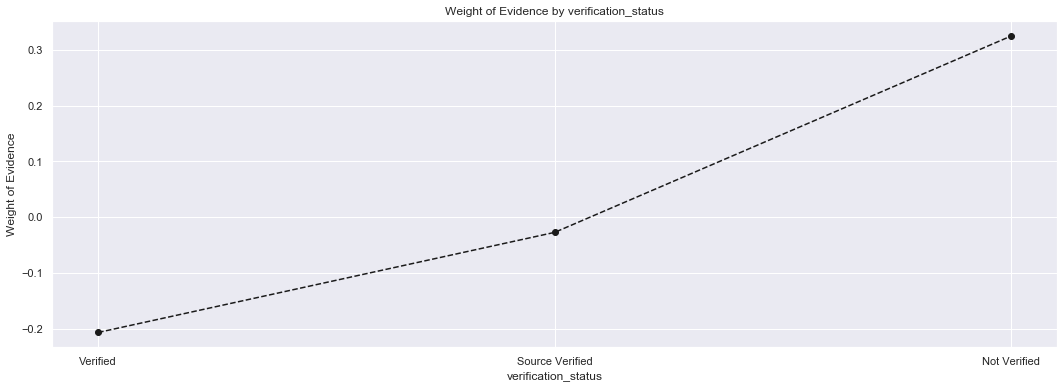

In [89]:
#Based on the plot, Not verified category has the highest WoE while Verified tha lowest. by looking at the nber of obs,
# the three have a similar nber of obs and are considerably high to be keep as separate variables
#The variable Verification status will have 3 different categories respectively
#"Veified"
#"Source_verified"
#"Not_Verified"
plot_by_woe(df_temp)

In [90]:
#The variables purpose of the loan
df_temp = woe_discrete(df_inputs_prep, 'purpose', df_targets_prep)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,house,1438,0.979138,0.003415,1408.0,30.0,0.003375,0.007669,-0.820746,NaN,NaN,inf
1,small_business,3364,0.980380,0.007989,3298.0,66.0,0.007905,0.016871,-0.758057,0.001243,0.062689,inf
2,moving,2420,0.980579,0.005747,2373.0,47.0,0.005688,0.012014,-0.747711,0.000198,0.010346,inf
3,medical,3938,0.986034,0.009352,3883.0,55.0,0.009308,0.014059,-0.412444,0.005455,0.335267,inf
4,renewable_energy,224,0.986607,0.000532,221.0,3.0,0.000530,0.000767,-0.369923,0.000574,0.042520,inf
5,major_purchase,7449,0.987381,0.017690,7355.0,94.0,0.017630,0.024029,-0.309633,0.000774,0.060290,inf
6,other,19204,0.987971,0.045605,18973.0,231.0,0.045479,0.059049,-0.261119,0.000590,0.048514,inf
7,vacation,2249,0.987995,0.005341,2222.0,27.0,0.005326,0.006902,-0.259148,0.000023,0.001972,inf
8,debt_consolidation,250020,0.989973,0.593739,247513.0,2507.0,0.593297,0.640849,-0.077098,0.001978,0.182050,inf
9,car,3466,0.991056,0.008231,3435.0,31.0,0.008234,0.007924,0.038311,0.001083,0.115409,inf


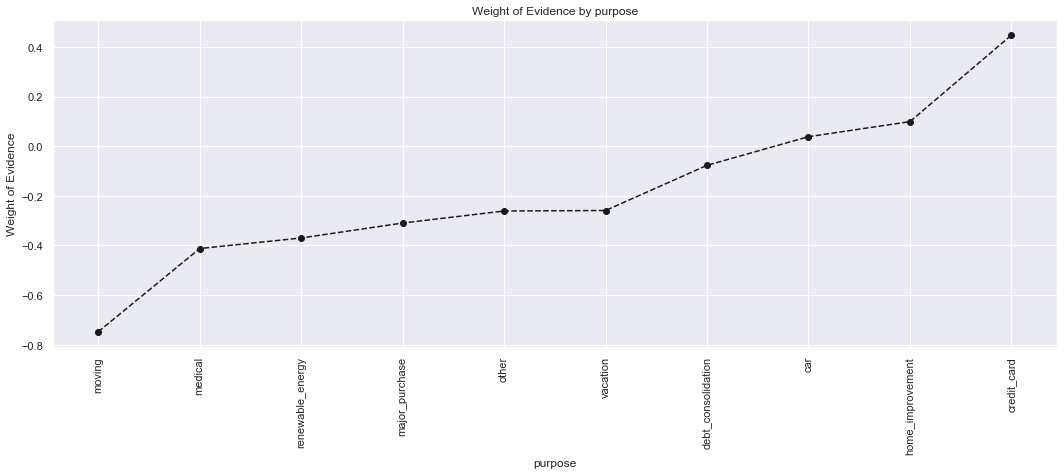

In [91]:
plot_by_woe(df_temp.iloc[2: -2,:], 90)
#The argument 90 is to rotate the names by 90°
#the categories "educational, small_business, renewable_energy, moving" have the lowest WoE and few number of observations to be considered as separate categories
#We will consider "educational, small_business" as the (worst)
#In the opposite the "credit_card " category has the highest WoE and the 2nd high nber of obs.the category "credit_card" will be considered as separate category  
#similarly "car" has a high WoE but a low nber of obs to be separate category.we will combine "car, home_improvement, major_purchase"

In [ ]:
#"renewable_energy, moving" have a low WoE and low nber obs. we will combine "educational, small_business,renewable_energy, moving"
#"home_improvement" has a high WoE and nber obs to be a separate category, "major_purchase" similarly has a high WoE but a low nbs of obs
#We will combine "car, home_improvement, major_purchase"
#"debt-consolidation" has the highest WoE and nbr of obs,we will consider as a separate category
#"vacation, medical, wedding, house" have the approx the similar WoE and a low nbr of obs. we will combine them together to obtain 
#an unique variable "vacation, medical, wedding, house" 
#"other" has the 3rd highest nbr of obs and can be considered as a separate variable"other"
#we will combine our categorical variables as follow from the worst to best

#"educational, small_business, renewable_energy, moving" 
#"other, vacation, medical, wedding, house"
#"debt_consolidation"
#"car, home_improvement, major_purchase"
#"credit_card"

In [92]:
#educational, small_business, renewable_energy, moving 
df_inputs_prep['purpose:edu_smbus_ren_mov'] = sum([df_inputs_prep['purpose:educational'], 
                                                   df_inputs_prep['purpose:small_business'],
                                                   df_inputs_prep['purpose:renewable_energy'], 
                                                   df_inputs_prep['purpose:moving']])

In [93]:
#other, vacation, medical, wedding, house
df_inputs_prep['purpose:other_vac_med_wedd_hse'] = sum([df_inputs_prep['purpose:other'], 
                                                        df_inputs_prep['purpose:vacation'],
                                                        df_inputs_prep['purpose:wedding'], 
                                                        df_inputs_prep['purpose:house']])

In [94]:
#car, home_improvement, major_purchase
df_inputs_prep['purpose:car_home_imp_mjpurchase'] = sum([df_inputs_prep['purpose:car'], 
                                                         df_inputs_prep['purpose:home_improvement'],
                                                         df_inputs_prep['purpose:major_purchase']])

In [95]:
#The variables initial_list_status
df_temp = woe_discrete(df_inputs_prep, 'initial_list_status', df_targets_prep)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,153843,0.986220,0.365341,151723.0,2120.0,0.363685,0.541922,-0.398833,NaN,NaN,0.129665
1,w,267251,0.993295,0.634659,265459.0,1792.0,0.636315,0.458078,0.328654,0.007075,0.727488,0.129665


**2.2 Preprocessing Continuous variables**

In [ ]:
#we will preprocess the continuous variables "term, salary, emp_lenght_int"

In [96]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [97]:
#The variables term_int
df_temp = woe_ordered_continuous(df_inputs_prep, 'term_int', df_targets_prep)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,283172,0.991729,0.672467,280830.0,2342.0,0.673159,0.598671,0.11727,NaN,NaN,0.024029
1,60,137922,0.988617,0.327533,136352.0,1570.0,0.326841,0.401329,-0.20531,0.003113,0.32258,0.024029


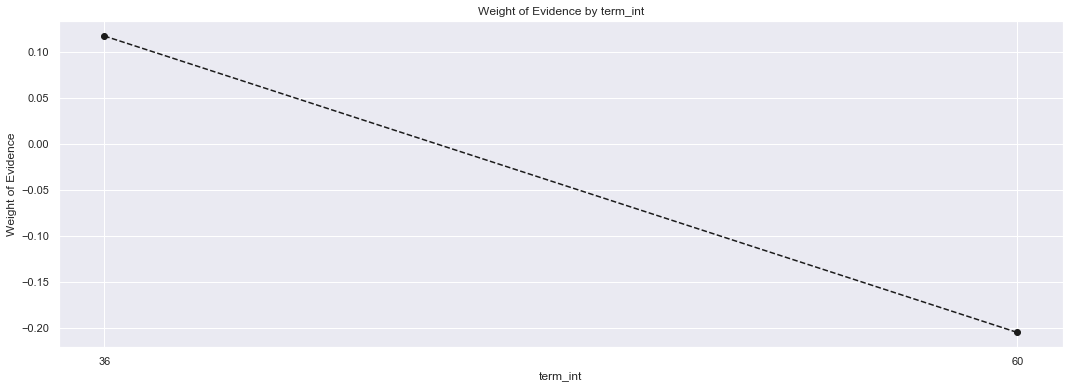

In [98]:
plot_by_woe(df_temp)
#It indicates tthat 60 mths loan are riskier than 30 months loan.
#we will create 2 dummies variables 60 and 36 using the month_int categorical variable. the riskier dummy 60 will be set as the reference

In [99]:
# Leave as is.
# '60' will be the reference category.
#We use the np.method to create two variables that will take the values 1 where term=36 and 0 where term=60
df_inputs_prep['term:36'] = np.where((df_inputs_prep['term_int'] == 36), 1, 0)
df_inputs_prep['term:60'] = np.where((df_inputs_prep['term_int'] == 60), 1, 0)

In [100]:
# emp_length_int
df_inputs_prep['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [101]:
df_temp = woe_ordered_continuous(df_inputs_prep, 'emp_length_int', df_targets_prep)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,58157,0.988634,0.138109,57496.0,661.0,0.137820,0.168967,-0.203757,NaN,NaN,0.023705
1,1.0,27473,0.988607,0.065242,27160.0,313.0,0.065103,0.080010,-0.206176,0.000027,0.002419,0.023705
2,2.0,37497,0.990986,0.089047,37159.0,338.0,0.089071,0.086401,0.030442,0.002379,0.236618,0.023705
3,3.0,33430,0.991385,0.079388,33142.0,288.0,0.079443,0.073620,0.076122,0.000399,0.045681,0.023705
4,4.0,24506,0.989431,0.058196,24247.0,259.0,0.058121,0.066207,-0.130254,0.001954,0.206376,0.023705
5,5.0,24930,0.989852,0.059203,24677.0,253.0,0.059152,0.064673,-0.089236,0.000420,0.041017,0.023705
6,6.0,16838,0.990141,0.039986,16672.0,166.0,0.039963,0.042434,-0.059976,0.000290,0.029261,0.023705
7,7.0,18414,0.989790,0.043729,18226.0,188.0,0.043688,0.048057,-0.095311,0.000351,0.035336,0.023705
8,8.0,21560,0.991698,0.051200,21381.0,179.0,0.051251,0.045757,0.113398,0.001907,0.208710,0.023705
9,9.0,16769,0.989683,0.039822,16596.0,173.0,0.039781,0.044223,-0.105848,0.002014,0.219247,0.023705


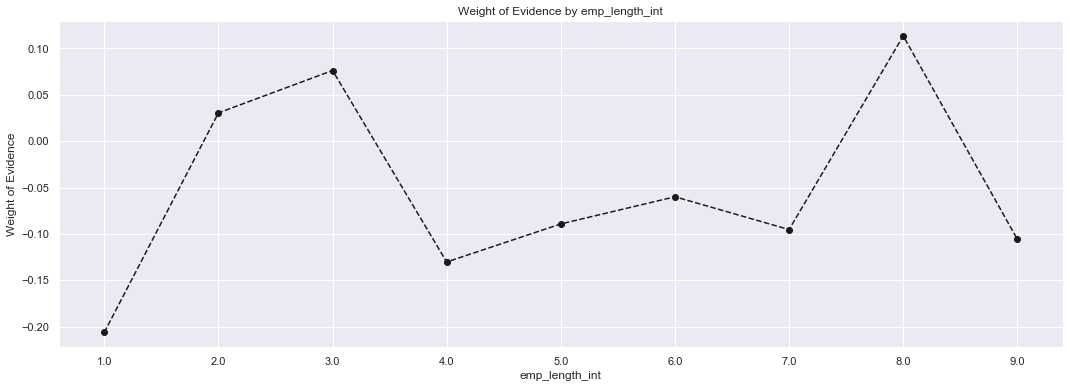

In [102]:
plot_by_woe(df_temp.iloc[1:-1, :])
# We plot the weight of evidence values.

In [103]:
#the category "O" or less than 1year has the lowest WoE but the second highest nbr of obs.
#We will set "0" as a separate category
#In the opposite, "10" shows the highest WoE and highest nbr obs to be consider as a separate category
#the category "1" has a much lower WoE relative other others categories, we will consider "1" as a separate category. 
#"2" and "3" have a similare WoE and and low nbr of obs. "4" as well has a low nbr of obs, We will combine the 3 categories "2, 3, 4"
#"5" and "6" have similar WoE and los nbr of obs. we will combine the 2 categories "5, 6"
#"7", "8", "9" are amongst th highest WoE but the lowest nbr of obs. we will combine them. "7, 8, 9" 

# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prep['emp_length:0'] = np.where(df_inputs_prep['emp_length_int'].isin([0]), 1, 0)
df_inputs_prep['emp_length:1'] = np.where(df_inputs_prep['emp_length_int'].isin([1]), 1, 0)
df_inputs_prep['emp_length:2-4'] = np.where(df_inputs_prep['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prep['emp_length:5-6'] = np.where(df_inputs_prep['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prep['emp_length:7-9'] = np.where(df_inputs_prep['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prep['emp_length:10'] = np.where(df_inputs_prep['emp_length_int'].isin([10]), 1, 0)

In [112]:
#3.Continuous variables months since issue date
df_inputs_prep['mths_since_issue_date'].unique()
#this variable has 90 categories
#We will apply Fine classing: roughly grouping the values into categories
#coarse classing:determining final categories, combine few of the initial fine classing categories into bigger categories

array([48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.])

In [113]:
df_inputs_prep['mths_since_issue_date_factor'] = pd.cut(df_inputs_prep['mths_since_issue_date'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [114]:
#We divided 
df_inputs_prep['mths_since_issue_date_factor']

0         (47.989, 48.22]
1         (47.989, 48.22]
2         (47.989, 48.22]
3         (47.989, 48.22]
4         (47.989, 48.22]
               ...       
421089      (58.78, 59.0]
421090      (58.78, 59.0]
421091      (58.78, 59.0]
421092      (58.78, 59.0]
421093      (58.78, 59.0]
Name: mths_since_issue_date_factor, Length: 421094, dtype: category
Categories (50, interval[float64]): [(47.989, 48.22] < (48.22, 48.44] < (48.44, 48.66] < (48.66, 48.88] ... (58.12, 58.34] < (58.34, 58.56] < (58.56, 58.78] < (58.78, 59.0]]

In [115]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prep, 'mths_since_issue_date_factor', df_targets_prep)
# We calculate WoE.
df_temp

,mths_since_issue_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(47.989, 48.22]",44342,0.999436,0.105302,44317.0,25.0,0.106229,0.006391,2.810774,NaN,NaN,1.145868
1,"(48.22, 48.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
2,"(48.44, 48.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
3,"(48.66, 48.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
4,"(48.88, 49.1]",37530,0.998375,0.089125,37469.0,61.0,0.089815,0.015593,1.750922,NaN,NaN,1.145868
5,"(49.1, 49.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
6,"(49.32, 49.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
7,"(49.54, 49.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
8,"(49.76, 49.98]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145868
9,"(49.98, 50.2]",48631,0.998190,0.115487,48543.0,88.0,0.116359,0.022495,1.643395,NaN,NaN,1.145868


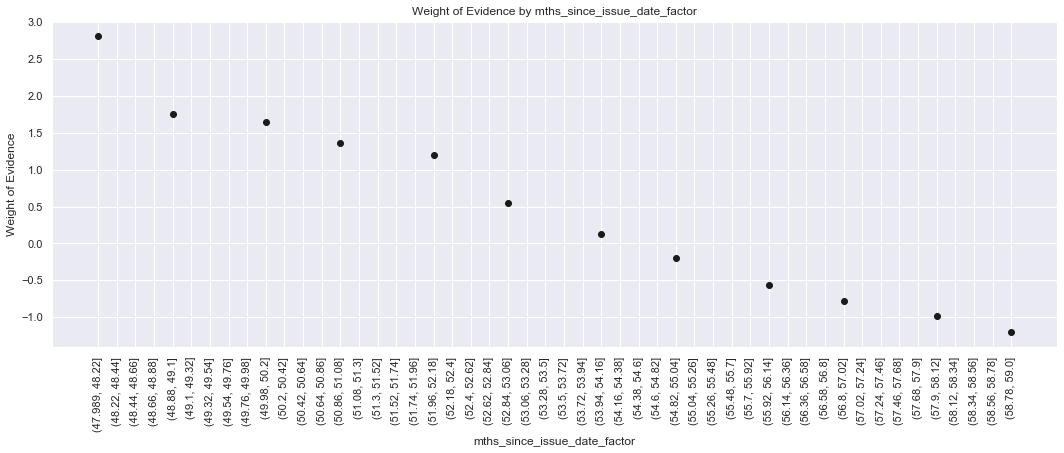

In [116]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

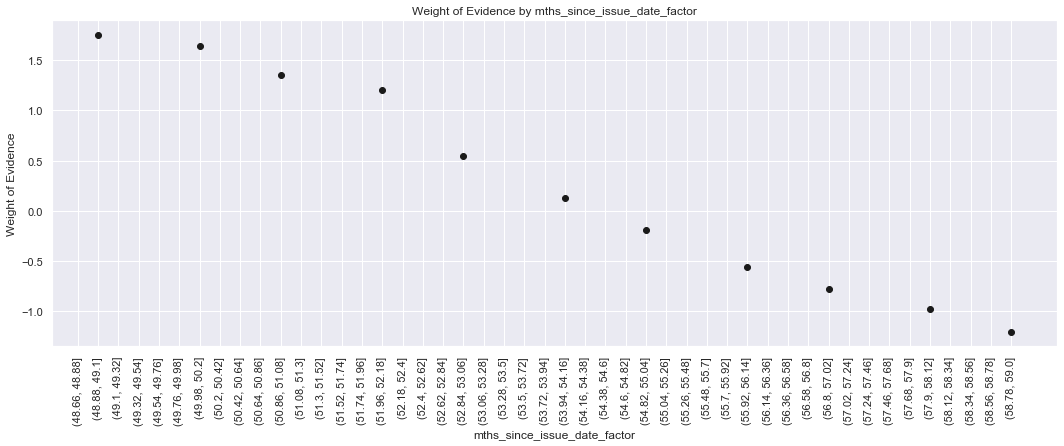

In [117]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [118]:
# We create the following categories:
# < 50, 50 - 51, 52 - 53, 54 - 60, 61 - 64, 65 - 76, 77 - 96, > 96.
#Range function the lower bond of the interval is included and the higher excluded.
df_inputs_prep['mths_since_issue_date:<50'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(50)), 1, 0)
df_inputs_prep['mths_since_issue_date:50-51'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(50, 52)), 1, 0)
df_inputs_prep['mths_since_issue_date:52-53'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(52, 54)), 1, 0)
df_inputs_prep['mths_since_issue_date:54-60'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(54, 61)), 1, 0)
df_inputs_prep['mths_since_issue_date:61-64'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(61, 65)), 1, 0)
df_inputs_prep['mths_since_issue_date:65-76'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(65, 77)), 1, 0)
df_inputs_prep['mths_since_issue_date:77-96'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(77, 97)), 1, 0)
df_inputs_prep['mths_since_issue_date:>96'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(97, int(df_inputs_prep['mths_since_issue_date'].max()))), 1, 0)

In [119]:
# int_rate
df_inputs_prep['int_rate_factor'] = pd.cut(df_inputs_prep['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values

In [120]:
df_temp = woe_ordered_continuous(df_inputs_prep, 'int_rate_factor', df_targets_prep)
# We calculate WoE.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",9651,0.999378,0.022919,9645.0,6.0,0.023119,0.001534,2.712962,NaN,NaN,inf
1,"(5.793, 6.267]",10214,0.998629,0.024256,10200.0,14.0,0.024450,0.003579,1.921612,0.000749,0.791350,inf
2,"(6.267, 6.74]",6530,0.996631,0.015507,6508.0,22.0,0.015600,0.005624,1.020271,0.001998,0.901341,inf
3,"(6.74, 7.214]",12488,0.997277,0.029656,12454.0,34.0,0.029853,0.008691,1.233963,0.000646,0.213692,inf
4,"(7.214, 7.687]",11416,0.998160,0.027110,11395.0,21.0,0.027314,0.005368,1.626934,0.000883,0.392971,inf
5,"(7.687, 8.16]",20636,0.997674,0.049006,20588.0,48.0,0.049350,0.012270,1.391789,0.000487,0.235145,inf
6,"(8.16, 8.634]",22498,0.996666,0.053428,22423.0,75.0,0.053749,0.019172,1.030881,0.001008,0.360908,inf
7,"(8.634, 9.107]",2020,0.990099,0.004797,2000.0,20.0,0.004794,0.005112,-0.064304,0.006567,1.095184,inf
8,"(9.107, 9.581]",22171,0.996798,0.052651,22100.0,71.0,0.052974,0.018149,1.071179,0.006699,1.135483,inf
9,"(9.581, 10.054]",22364,0.997183,0.053109,22301.0,63.0,0.053456,0.016104,1.199778,0.000385,0.128599,inf


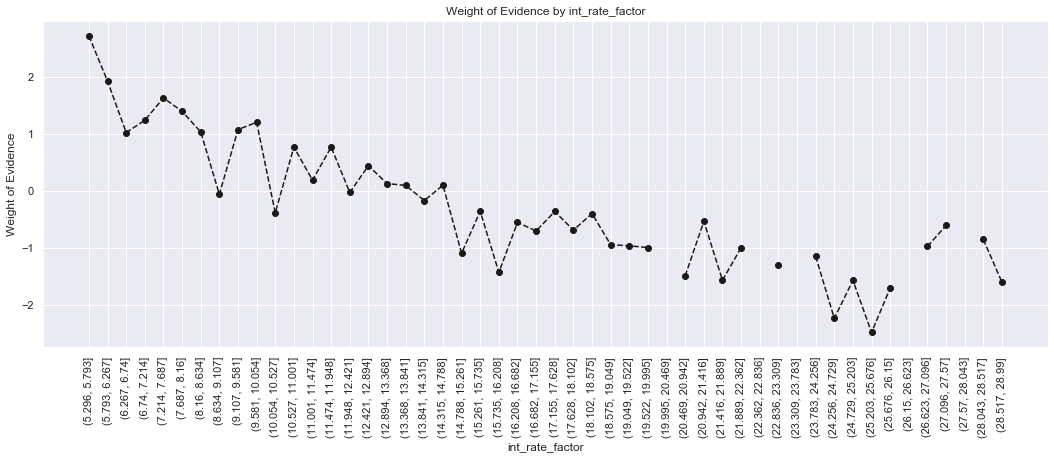

In [121]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
#the graph indicates a monotonic relationship between IR and WoE. the higher the IR, the lower is the 
#-WoE and consequently the PD
#The 1st 10 categories from the interval[5.399, 5.833] to [9.135, 9.548]have a high and unstable WoE but low nbr of obs.
#-we can combine them into one interval category [<= 9.548]
#Similarly we combine the interval from [9.548, 9.961] to [11.612, 12.025] can be combined into > 9.548 and =< 12.025
#the interval[12.025, 12.438] to [15.327, 15.74] can be combined into an interval > 12.025 and =< 15.74
#the interval [15.74, 16.153] and [19.868, 20.281] can be combined into > 15.74 and =< 20.281
#The last category > 20.281

In [122]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
# <=9.548, >9.548 =< 12.025, >12.025 =< 15.74, >15.74=<20.281, >20.281
#Ref cat=int_rate:>20.281
df_inputs_prep['int_rate:<9.548'] = np.where((df_inputs_prep['int_rate'] <= 9.548), 1, 0)
df_inputs_prep['int_rate:9.548-12.025'] = np.where((df_inputs_prep['int_rate'] > 9.548) & (df_inputs_prep['int_rate'] <= 12.025), 1, 0)
df_inputs_prep['int_rate:12.025-15.74'] = np.where((df_inputs_prep['int_rate'] > 12.025) & (df_inputs_prep['int_rate'] <= 15.74), 1, 0)
df_inputs_prep['int_rate:15.74-20.281'] = np.where((df_inputs_prep['int_rate'] > 15.74) & (df_inputs_prep['int_rate'] <= 20.281), 1, 0)
df_inputs_prep['int_rate:>20.281'] = np.where((df_inputs_prep['int_rate'] > 20.281), 1, 0)

In [123]:
# funded_amnt
df_inputs_prep['funded_amnt_factor'] = pd.cut(df_inputs_prep['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'funded_amnt_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(966.0, 1680.0]",3391,0.990268,0.008053,3358.0,33.0,0.008049,0.008436,-0.046881,NaN,NaN,0.030314
1,"(1680.0, 2360.0]",3751,0.990936,0.008908,3717.0,34.0,0.008910,0.008691,0.024838,0.000667,0.071718,0.030314
2,"(2360.0, 3040.0]",8134,0.989550,0.019316,8049.0,85.0,0.019294,0.021728,-0.118822,0.001386,0.143660,0.030314
3,"(3040.0, 3720.0]",5133,0.991038,0.012190,5087.0,46.0,0.012194,0.011759,0.036328,0.001488,0.155150,0.030314
4,"(3720.0, 4400.0]",7315,0.988380,0.017371,7230.0,85.0,0.017331,0.021728,-0.226131,0.002658,0.262459,0.030314
5,"(4400.0, 5080.0]",18150,0.990523,0.043102,17978.0,172.0,0.043094,0.043967,-0.020064,0.002143,0.206067,0.030314
6,"(5080.0, 5760.0]",5617,0.992523,0.013339,5575.0,42.0,0.013363,0.010736,0.218904,0.001999,0.238968,0.030314
7,"(5760.0, 6440.0]",16224,0.990138,0.038528,16064.0,160.0,0.038506,0.040900,-0.060312,0.002385,0.279216,0.030314
8,"(6440.0, 7120.0]",10565,0.991008,0.025089,10470.0,95.0,0.025097,0.024284,0.032919,0.000870,0.093230,0.030314
9,"(7120.0, 7800.0]",8423,0.990383,0.020003,8342.0,81.0,0.019996,0.020706,-0.034865,0.000625,0.067783,0.030314


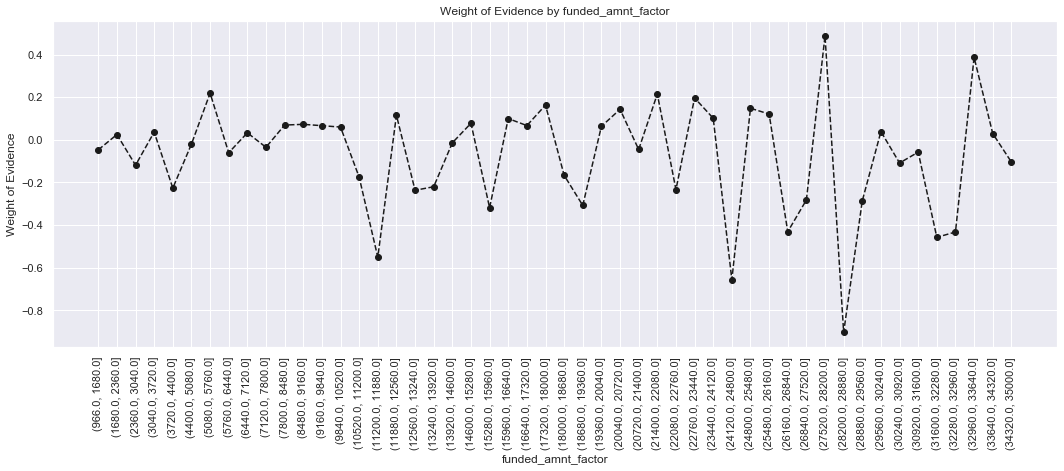

In [124]:
##Not include
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
#the WoE of the different categories varies too much, this is an evidence that there is no relationship
#between the funded amount and the dependent variable. consequently we will not include this variable 

In [125]:
# mths_since_earliest_cr_line
df_inputs_prep['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prep['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'mths_since_earliest_cr_line_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(72.474, 83.52]",2001,0.994503,0.004752,1990.0,11.0,0.004770,0.002812,0.528521,NaN,NaN,inf
1,"(83.52, 94.04]",4886,0.987720,0.011603,4826.0,60.0,0.011568,0.015337,-0.282045,6.782732e-03,0.810566,inf
2,"(94.04, 104.56]",4610,0.986768,0.010948,4549.0,61.0,0.010904,0.015593,-0.357685,9.521205e-04,0.075640,inf
3,"(104.56, 115.08]",5446,0.987147,0.012933,5376.0,70.0,0.012886,0.017894,-0.328269,3.786337e-04,0.029416,inf
4,"(115.08, 125.6]",6146,0.987146,0.014595,6067.0,79.0,0.014543,0.020194,-0.328302,4.182711e-07,0.000033,inf
5,"(125.6, 136.12]",10200,0.987647,0.024223,10074.0,126.0,0.024148,0.032209,-0.288043,5.009475e-04,0.040260,inf
6,"(136.12, 146.64]",11155,0.986732,0.026491,11007.0,148.0,0.026384,0.037832,-0.360399,9.146518e-04,0.072357,inf
7,"(146.64, 157.16]",15641,0.988748,0.037144,15465.0,176.0,0.037070,0.044990,-0.193623,2.015116e-03,0.166776,inf
8,"(157.16, 167.68]",18480,0.990260,0.043886,18300.0,180.0,0.043866,0.046012,-0.047774,1.512218e-03,0.145849,inf
9,"(167.68, 178.2]",24374,0.989128,0.057883,24109.0,265.0,0.057790,0.067740,-0.158863,1.131981e-03,0.111089,inf


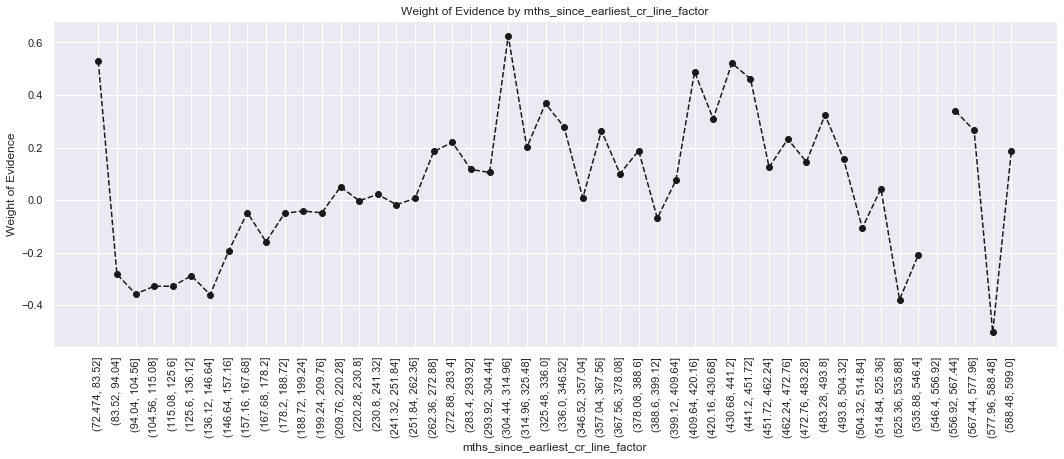

In [126]:
plot_by_woe(df_temp, 90)
# We plot the WoE values
#The 1st seven categories have no values

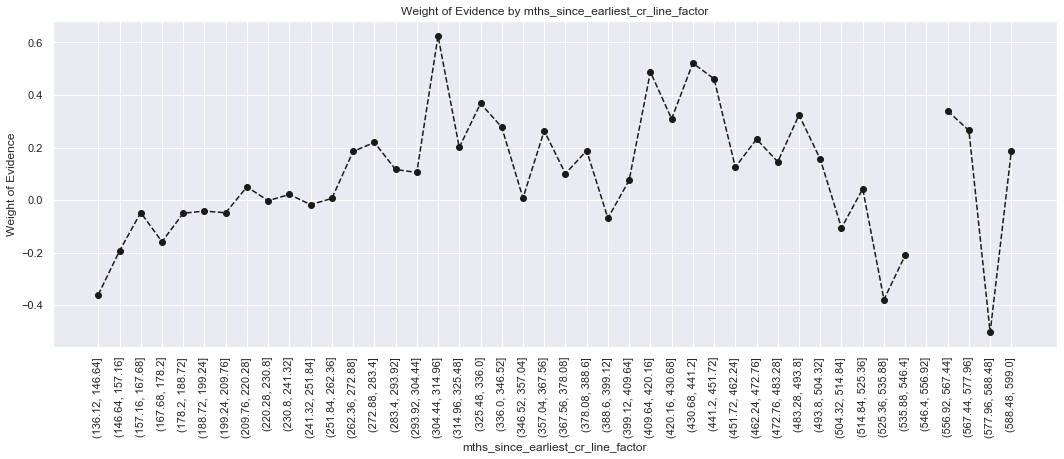

In [127]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.    
#We 1st interval is from [-0.599, 11.98] to [131.78, 143.76] we can combine them into one intarval =< 131.78
#the 2nd interval category from [143.76, 155.74] to [155.74, 167.72] can be combine into [144-167]
#The 3rd interval from [167.72, 179.7] to [227.62, 239.6] can be combine into [168-239]
#[239.6, 251.58] to [263.56, 275.54] combined to [240-275]
#[275.54, 287.52] to [359.4, 371.38] combined to [276-371]
#[371.38, 383.36] to [587.02, 599.0] >= 371

In [128]:
# We create the following categories:
# < 144, 144 - 167, 168 - 239, 240 - 275, 276 - 371, > 371
df_inputs_prep['mths_since_earliest_cr_line:<144'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(144)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:144-167'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(144, 168)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:168-239'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(168, 240)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:240-275'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(240, 276)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:276-371'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(276, 372)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:>371'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(372, int(df_inputs_prep['mths_since_earliest_cr_line'].max()))), 1, 0)

**Fine classing the variable equals to cut it into categories**

In [129]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prep, 'delinq_2yrs', df_targets_prep)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,334007,0.990845,0.793189,330949.0,3058.0,0.793296,0.781697,0.014729,NaN,NaN,inf
1,1.0,57000,0.990614,0.135362,56465.0,535.0,0.135349,0.136759,-0.010364,0.000230,0.025094,inf
2,2.0,17241,0.990256,0.040943,17073.0,168.0,0.040925,0.042945,-0.048184,0.000358,0.037820,inf
3,3.0,6293,0.989353,0.014944,6226.0,67.0,0.014924,0.017127,-0.137677,0.000903,0.089493,inf
4,4.0,2949,0.986097,0.007003,2908.0,41.0,0.006971,0.010481,-0.407825,0.003256,0.270148,inf
5,5.0,1475,0.988475,0.003503,1458.0,17.0,0.003495,0.004346,-0.217866,0.002378,0.189959,inf
6,6.0,842,0.986936,0.002000,831.0,11.0,0.001992,0.002812,-0.344739,0.001539,0.126873,inf
7,7.0,438,0.988584,0.001040,433.0,5.0,0.001038,0.001278,-0.208174,0.001649,0.136565,inf
8,8.0,284,0.989437,0.000674,281.0,3.0,0.000674,0.000767,-0.129731,0.000852,0.078443,inf
9,9.0,173,0.988439,0.000411,171.0,2.0,0.000410,0.000511,-0.220957,0.000997,0.091226,inf


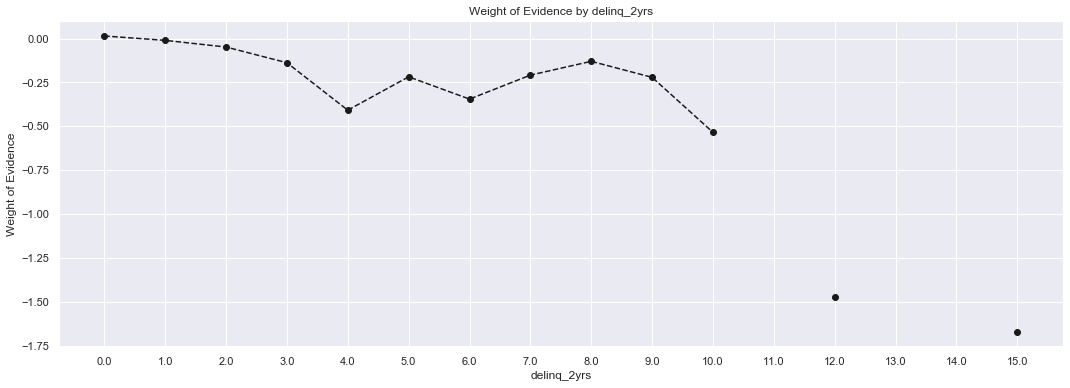

In [130]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

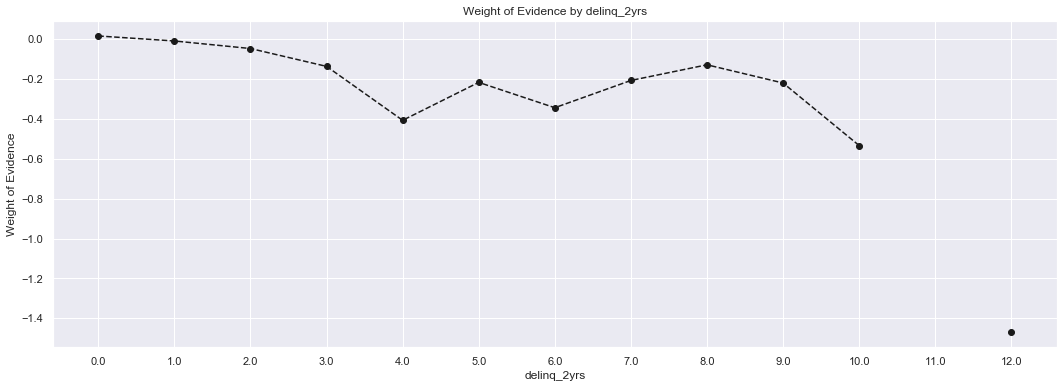

In [131]:
plot_by_woe(df_temp.iloc[0:14,:])

In [132]:
# Categories: 0, 1-3, >=4
df_inputs_prep['delinq_2yrs:0'] = np.where((df_inputs_prep['delinq_2yrs'] == 0), 1, 0)
df_inputs_prep['delinq_2yrs:1-3'] = np.where((df_inputs_prep['delinq_2yrs'] >= 1) & (df_inputs_prep['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prep['delinq_2yrs:>=4'] = np.where((df_inputs_prep['delinq_2yrs'] >= 9), 1, 0)

In [133]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prep, 'inq_last_6mths', df_targets_prep)
# We calculate weight of evidence.
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,256407,0.992391,0.608907,254456.0,1951.0,0.609940,0.498722,0.201312,NaN,NaN,inf
1,1.0,111346,0.989402,0.264421,110166.0,1180.0,0.264072,0.301636,-0.133000,0.002989,0.334312,inf
2,2.0,36292,0.986278,0.086185,35794.0,498.0,0.085799,0.127301,-0.394538,0.003124,0.261538,inf
3,3.0,12272,0.982562,0.029143,12058.0,214.0,0.028903,0.054703,-0.637966,0.003716,0.243428,inf
4,4.0,3517,0.986636,0.008352,3470.0,47.0,0.008318,0.012014,-0.367712,0.004074,0.270255,inf
5,5.0,1217,0.981923,0.002890,1195.0,22.0,0.002864,0.005624,-0.674615,0.004714,0.306903,inf
6,6.0,43,1.000000,0.000102,43.0,0.0,0.000103,0.000000,inf,0.018077,inf,inf


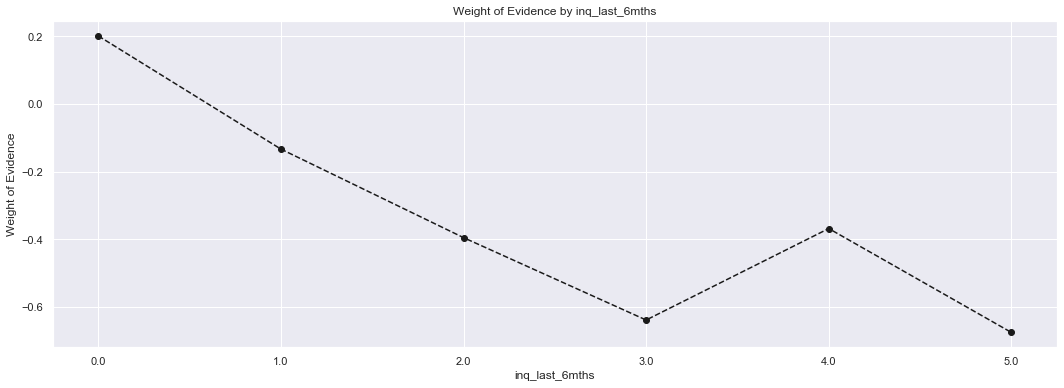

In [134]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [135]:
# Categories: 0, 1 - 2, 3 - 5, > 5
df_inputs_prep['inq_last_6mths:0'] = np.where((df_inputs_prep['inq_last_6mths'] == 0), 1, 0)
df_inputs_prep['inq_last_6mths:1-2'] = np.where((df_inputs_prep['inq_last_6mths'] >= 1) & (df_inputs_prep['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prep['inq_last_6mths:3-5'] = np.where((df_inputs_prep['inq_last_6mths'] >= 3) & (df_inputs_prep['inq_last_6mths'] <= 5), 1, 0)
df_inputs_prep['inq_last_6mths:>5'] = np.where((df_inputs_prep['inq_last_6mths'] > 5), 1, 0)

In [136]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prep, 'open_acc', df_targets_prep)
# We calculate weight of evidence.
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,90,1.000000,0.000214,90.0,0.0,0.000216,0.000000,inf,NaN,NaN,inf
1,2.0,986,0.986815,0.002342,973.0,13.0,0.002332,0.003323,-0.354039,0.013185,inf,inf
2,3.0,4119,0.990774,0.009782,4081.0,38.0,0.009782,0.009714,0.007037,0.003959,0.361076,inf
3,4.0,10779,0.990444,0.025598,10676.0,103.0,0.025591,0.026329,-0.028449,0.000330,0.035487,inf
4,5.0,18222,0.990286,0.043273,18045.0,177.0,0.043255,0.045245,-0.045000,0.000158,0.016550,inf
5,6.0,25117,0.989768,0.059647,24860.0,257.0,0.059590,0.065695,-0.097535,0.000519,0.052535,inf
6,7.0,30294,0.990262,0.071941,29999.0,295.0,0.071909,0.075409,-0.047530,0.000494,0.050005,inf
7,8.0,34685,0.990111,0.082369,34342.0,343.0,0.082319,0.087679,-0.063080,0.000151,0.015550,inf
8,9.0,36266,0.990901,0.086123,35936.0,330.0,0.086140,0.084356,0.020928,0.000790,0.084008,inf
9,10.0,35809,0.990477,0.085038,35468.0,341.0,0.085018,0.087168,-0.024970,0.000423,0.045899,inf


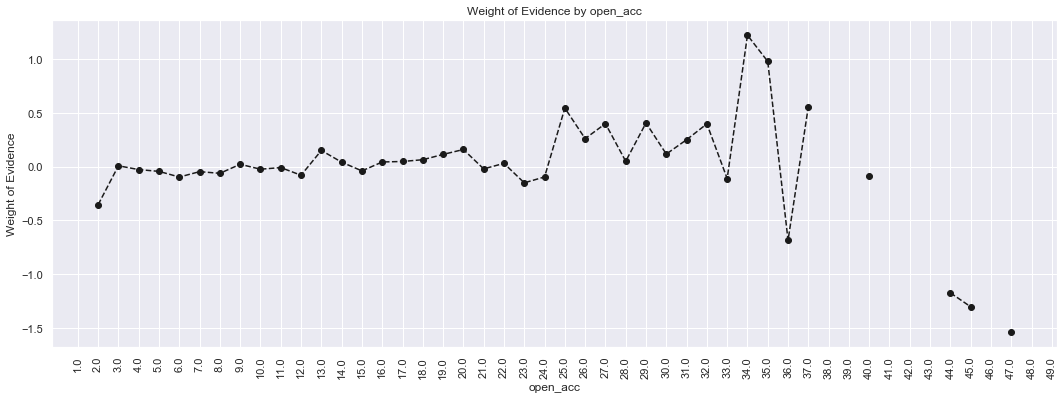

In [137]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

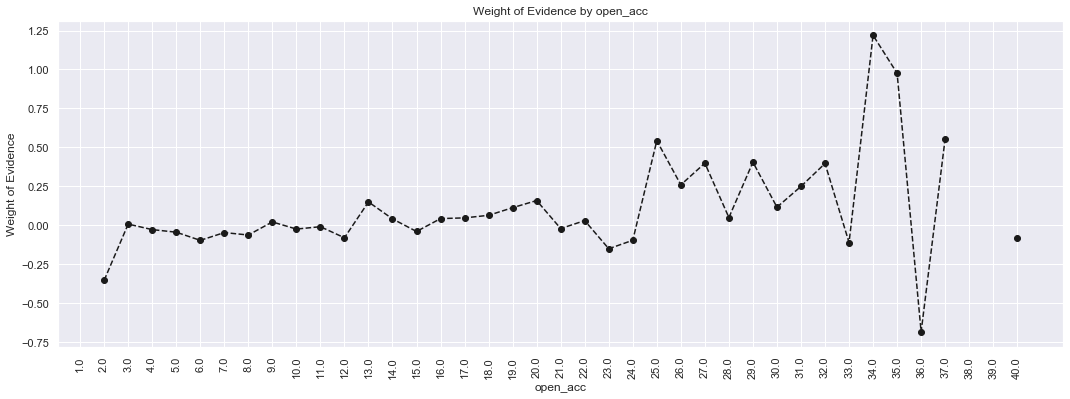

In [138]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [139]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22','>22'
df_inputs_prep['open_acc:0'] = np.where((df_inputs_prep['open_acc'] == 0), 1, 0)
df_inputs_prep['open_acc:1-3'] = np.where((df_inputs_prep['open_acc'] >= 1) & (df_inputs_prep['open_acc'] <= 3), 1, 0)
df_inputs_prep['open_acc:4-12'] = np.where((df_inputs_prep['open_acc'] >= 4) & (df_inputs_prep['open_acc'] <= 12), 1, 0)
df_inputs_prep['open_acc:13-17'] = np.where((df_inputs_prep['open_acc'] >= 13) & (df_inputs_prep['open_acc'] <= 17), 1, 0)
df_inputs_prep['open_acc:18-22'] = np.where((df_inputs_prep['open_acc'] >= 18) & (df_inputs_prep['open_acc'] <= 22), 1, 0)
df_inputs_prep['open_acc:>=23'] = np.where((df_inputs_prep['open_acc'] >= 23), 1, 0)

In [140]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prep, 'pub_rec', df_targets_prep)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,346679,0.990807,0.823282,343492.0,3187.0,0.823362,0.814673,0.010610,NaN,NaN,inf
1,1.0,60215,0.990152,0.142997,59622.0,593.0,0.142916,0.151585,-0.058888,0.000655,0.069498,inf
2,2.0,9230,0.990899,0.021919,9146.0,84.0,0.021923,0.021472,0.020781,0.000747,0.079670,inf
3,3.0,2876,0.989917,0.006830,2847.0,29.0,0.006824,0.007413,-0.082749,0.000983,0.103530,inf
4,4.0,1044,0.990421,0.002479,1034.0,10.0,0.002479,0.002556,-0.030869,0.000505,0.051880,inf
5,5.0,481,0.989605,0.001142,476.0,5.0,0.001141,0.001278,-0.113494,0.000816,0.082625,inf
6,6.0,249,0.991968,0.000591,247.0,2.0,0.000592,0.000511,0.146767,0.002363,0.260261,inf
7,7.0,108,1.000000,0.000256,108.0,0.0,0.000259,0.000000,inf,0.008032,inf,inf
8,8.0,84,1.000000,0.000199,84.0,0.0,0.000201,0.000000,inf,0.000000,NaN,inf
9,9.0,34,1.000000,0.000081,34.0,0.0,0.000081,0.000000,inf,0.000000,NaN,inf


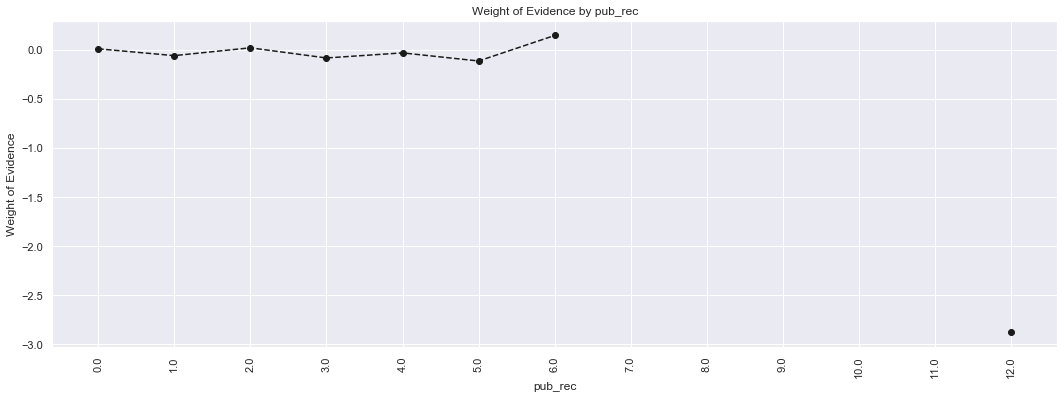

In [141]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [142]:
# Categories '0','>=1'
df_inputs_prep['pub_rec:0'] = np.where((df_inputs_prep['pub_rec'] == 0), 1, 0)
df_inputs_prep['pub_rec:>=1'] = np.where((df_inputs_prep['pub_rec'] >= 1), 1, 0)

In [143]:
# total_acc
df_inputs_prep['total_acc_factor'] = pd.cut(df_inputs_prep['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'total_acc_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.835, 7.3]",11333,0.989853,0.026913,11218.0,115.0,0.026890,0.029397,-0.089131,NaN,NaN,inf
1,"(7.3, 10.6]",21005,0.988860,0.049882,20771.0,234.0,0.049789,0.059816,-0.183482,0.000993,0.094351,inf
2,"(10.6, 13.9]",31446,0.990078,0.074677,31134.0,312.0,0.074629,0.079755,-0.066421,0.001218,0.117061,inf
3,"(13.9, 17.2]",53180,0.990936,0.126290,52698.0,482.0,0.126319,0.123211,0.024915,0.000858,0.091336,inf
4,"(17.2, 20.5]",44528,0.990568,0.105744,44108.0,420.0,0.105728,0.107362,-0.015332,0.000369,0.040247,inf
5,"(20.5, 23.8]",44749,0.990078,0.106268,44305.0,444.0,0.106201,0.113497,-0.066446,0.000490,0.051113,inf
6,"(23.8, 27.1]",55586,0.990861,0.132004,55078.0,508.0,0.132024,0.129857,0.016550,0.000783,0.082996,inf
7,"(27.1, 30.4]",35493,0.991858,0.084288,35204.0,289.0,0.084385,0.073875,0.133014,0.000997,0.116464,inf
8,"(30.4, 33.7]",29540,0.991334,0.070151,29284.0,256.0,0.070195,0.065440,0.070145,0.000524,0.062869,inf
9,"(33.7, 37.0]",30463,0.991399,0.072343,30201.0,262.0,0.072393,0.066973,0.077812,0.000066,0.007667,inf


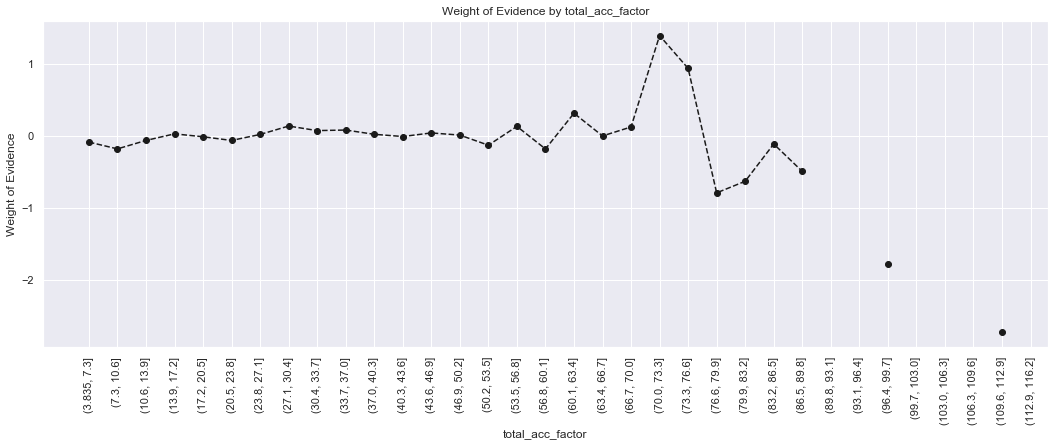

In [144]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [145]:
# Categories: '<16', '15-25', '26-38','>39'
df_inputs_prep['total_acc:Missing'] = np.where((df_inputs_prep['total_acc'].isnull()), 1, 0)
df_inputs_prep['total_acc:<15'] = np.where((df_inputs_prep['total_acc'] < 16), 1, 0)
df_inputs_prep['total_acc:16-25'] = np.where((df_inputs_prep['total_acc'] >= 16) & (df_inputs_prep['total_acc'] <= 25), 1, 0)
df_inputs_prep['total_acc:26-38'] = np.where((df_inputs_prep['total_acc'] >= 26) & (df_inputs_prep['total_acc'] <= 38), 1, 0)
df_inputs_prep['total_acc:>=39'] = np.where((df_inputs_prep['total_acc'] >= 39), 1, 0)

In [146]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prep, 'acc_now_delinq', df_targets_prep)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,418712,0.990741,0.994343,414835.0,3877.0,0.994374,0.991053,0.003345,NaN,NaN,inf
1,1.0,2243,0.985733,0.005327,2211.0,32.0,0.005300,0.008180,-0.434010,0.005007,0.437355,inf
2,2.0,116,0.974138,0.000275,113.0,3.0,0.000271,0.000767,-1.040698,0.011595,0.606689,inf
3,3.0,17,1.000000,0.000040,17.0,0.0,0.000041,0.000000,inf,0.025862,inf,inf
4,4.0,3,1.000000,0.000007,3.0,0.0,0.000007,0.000000,inf,0.000000,NaN,inf
5,5.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
6,6.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
7,14.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


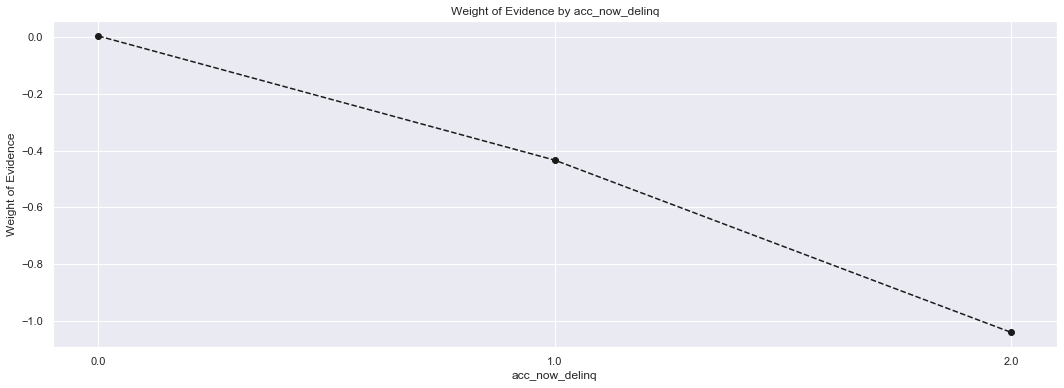

In [147]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [148]:
# Categories: '0', '>=1'
df_inputs_prep['acc_now_delinq:0'] = np.where((df_inputs_prep['acc_now_delinq'] == 0), 1, 0)
df_inputs_prep['acc_now_delinq:>=1'] = np.where((df_inputs_prep['acc_now_delinq'] >= 1), 1, 0)

In [149]:
# total_rev_hi_lim
df_inputs_prep['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prep['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'total_rev_hi_lim_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",12981,0.984516,0.030827,12780.0,201.0,0.030634,0.051380,-0.517142,NaN,NaN,inf
1,"(5000.0, 9999.999]",42858,0.986980,0.101778,42300.0,558.0,0.101395,0.142638,-0.341290,0.002464,0.175852,inf
2,"(9999.999, 14999.998]",56173,0.989497,0.133398,55583.0,590.0,0.133234,0.150818,-0.123964,0.002516,0.217327,inf
3,"(14999.998, 19999.998]",54873,0.990050,0.130311,54327.0,546.0,0.130224,0.139571,-0.069316,0.000553,0.054648,inf
4,"(19999.998, 24999.997]",46739,0.991356,0.110994,46335.0,404.0,0.111067,0.103272,0.072764,0.001307,0.142080,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


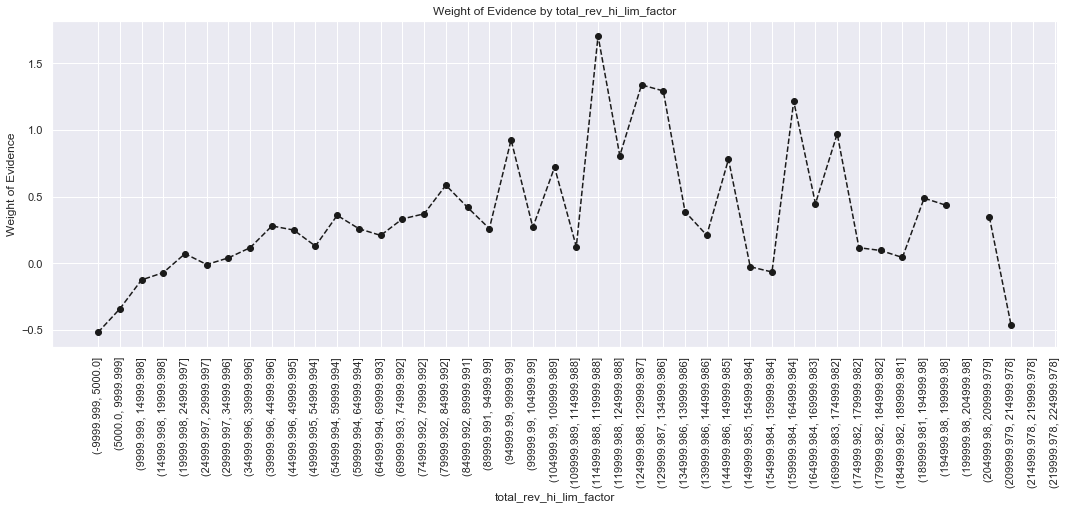

In [150]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [151]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prep['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prep['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prep['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 5000) & (df_inputs_prep['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prep['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 10000) & (df_inputs_prep['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prep['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 20000) & (df_inputs_prep['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prep['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 30000) & (df_inputs_prep['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prep['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 40000) & (df_inputs_prep['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prep['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 55000) & (df_inputs_prep['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prep['total_rev_hi_lim:>95K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 95000), 1, 0)

In [152]:
# installment
df_inputs_prep['installment_factor'] = pd.cut(df_inputs_prep['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'installment_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(28.705, 58.427]",3506,0.990588,0.008326,3473.0,33.0,0.008325,0.008436,-0.013207,NaN,NaN,0.042524
1,"(58.427, 86.734]",5832,0.991084,0.013850,5780.0,52.0,0.013855,0.013292,0.041441,0.000496,0.054649,0.042524
2,"(86.734, 115.04]",8123,0.990151,0.019290,8043.0,80.0,0.019279,0.020450,-0.058943,0.000932,0.100384,0.042524
3,"(115.04, 143.347]",9139,0.990262,0.021703,9050.0,89.0,0.021693,0.022751,-0.047590,0.000110,0.011353,0.042524
4,"(143.347, 171.654]",17953,0.991589,0.042634,17802.0,151.0,0.042672,0.038599,0.100312,0.001328,0.147903,0.042524
5,"(171.654, 199.961]",15515,0.992201,0.036845,15394.0,121.0,0.036900,0.030930,0.176469,0.000612,0.076156,0.042524
6,"(199.961, 228.268]",16515,0.990070,0.039219,16351.0,164.0,0.039194,0.041922,-0.067296,0.002131,0.243765,0.042524
7,"(228.268, 256.574]",22043,0.992560,0.052347,21879.0,164.0,0.052445,0.041922,0.223942,0.002490,0.291238,0.042524
8,"(256.574, 284.881]",25323,0.990522,0.060136,25083.0,240.0,0.060125,0.061350,-0.020167,0.002038,0.244109,0.042524
9,"(284.881, 313.188]",24135,0.990222,0.057315,23899.0,236.0,0.057287,0.060327,-0.051714,0.000301,0.031547,0.042524


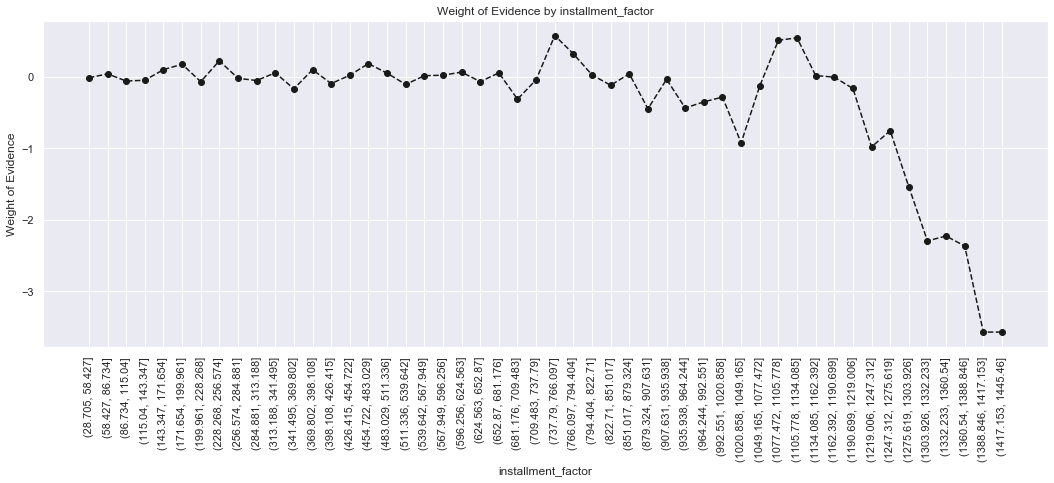

In [153]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
#We won't be using this variable

In [154]:
#annual income
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
df_temp
#Based on the table, we observe that the data are largely unbalanced. the 1 interval category accounts for more than 95% of nber of obs.
#therefore 50 categories was not enough to find classes of the variable, we have to increase the number of categories to 100
#by splitting the variable into more than 50 classes 

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",409693,0.990664,0.972925,405868.0,3825.0,0.972880,0.977761,-0.005004,NaN,NaN,inf
1,"(190000.0, 380000.0]",10007,0.991806,0.023764,9925.0,82.0,0.023791,0.020961,0.126619,0.001142,0.131623,inf
2,"(380000.0, 570000.0]",943,0.996819,0.002239,940.0,3.0,0.002253,0.000767,1.077794,0.005013,0.951175,inf
3,"(570000.0, 760000.0]",257,0.996109,0.000610,256.0,1.0,0.000614,0.000256,0.875704,0.000710,0.202090,inf
4,"(760000.0, 950000.0]",70,1.000000,0.000166,70.0,0.0,0.000168,0.000000,inf,0.003891,inf,inf
5,"(950000.0, 1140000.0]",43,1.000000,0.000102,43.0,0.0,0.000103,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",20,1.000000,0.000047,20.0,0.0,0.000048,0.000000,inf,0.000000,NaN,inf
7,"(1330000.0, 1520000.0]",14,1.000000,0.000033,14.0,0.0,0.000034,0.000000,inf,0.000000,NaN,inf
8,"(1520000.0, 1710000.0]",3,1.000000,0.000007,3.0,0.0,0.000007,0.000000,inf,0.000000,NaN,inf
9,"(1710000.0, 1900000.0]",5,1.000000,0.000012,5.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf


In [155]:
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
df_temp
#still the 1st interval accounts for more 65%  of all obs. if we apply logic, this is kind of expected since we have few peoples with 
#high income and lot of people with low inc.
#perhaps we should segregate people with high income and investigate people with lower income separetly
#As income grows, the nber of obs decreases
#We can create a dummy for people with high inc and for people with lower inc next
#if we set the treshold for people with higher inc at 150785K, the total nber of peoples with high inc will accounts for nearly 4% of nbs obs
#we wil create a category for people with income higher than 150K
#We first investigate people with inc lower or equal to 150K. we will separate and store them in a temporary df 

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 95000.0]",325648,0.990097,0.773338,322423.0,3225.0,0.772859,0.824387,-0.064542,NaN,NaN,inf
1,"(95000.0, 190000.0]",84045,0.992861,0.199587,83445.0,600.0,0.200021,0.153374,0.265540,0.002764,0.330082,inf
2,"(190000.0, 285000.0]",8186,0.991937,0.019440,8120.0,66.0,0.019464,0.016871,0.142957,0.000924,0.122583,inf
3,"(285000.0, 380000.0]",1821,0.991214,0.004324,1805.0,16.0,0.004327,0.004090,0.056253,0.000724,0.086704,inf
4,"(380000.0, 475000.0]",652,0.995399,0.001548,649.0,3.0,0.001556,0.000767,0.707347,0.004185,0.651093,inf
5,"(475000.0, 570000.0]",291,1.000000,0.000691,291.0,0.0,0.000698,0.000000,inf,0.004601,inf,inf
6,"(570000.0, 665000.0]",165,0.993939,0.000392,164.0,1.0,0.000393,0.000256,0.430393,0.006061,inf,inf
7,"(665000.0, 760000.0]",92,1.000000,0.000218,92.0,0.0,0.000221,0.000000,inf,0.006061,inf,inf
8,"(760000.0, 855000.0]",46,1.000000,0.000109,46.0,0.0,0.000110,0.000000,inf,0.000000,NaN,inf
9,"(855000.0, 950000.0]",24,1.000000,0.000057,24.0,0.0,0.000058,0.000000,inf,0.000000,NaN,inf


In [156]:
#we create a temp var for people with inc lower or equal to 150K 
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['annual_inc'] <= 150000, : ]

In [157]:
df_inputs_prep_temp['annual_inc_factor'] = pd.cut(df_inputs_prep_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'annual_inc_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-150.0, 3000.0]",5,1.000000,0.000013,5.0,0.0,0.000013,0.000000,inf,NaN,NaN,inf
1,"(3000.0, 6000.0]",16,1.000000,0.000040,16.0,0.0,0.000041,0.000000,inf,0.000000,NaN,inf
2,"(6000.0, 9000.0]",106,0.981132,0.000266,104.0,2.0,0.000264,0.000532,-0.703317,0.018868,inf,inf
3,"(9000.0, 12000.0]",669,0.988042,0.001679,661.0,8.0,0.001675,0.002130,-0.240249,0.006910,0.463069,inf
4,"(12000.0, 15000.0]",1193,0.988265,0.002995,1179.0,14.0,0.002988,0.003727,-0.221197,0.000223,0.019052,inf
5,"(15000.0, 18000.0]",1735,0.992507,0.004355,1722.0,13.0,0.004364,0.003461,0.231731,0.004242,0.452928,inf
6,"(18000.0, 21000.0]",3187,0.987449,0.008000,3147.0,40.0,0.007975,0.010650,-0.289236,0.005058,0.520967,inf
7,"(21000.0, 24000.0]",4368,0.986493,0.010965,4309.0,59.0,0.010919,0.015708,-0.363637,0.000956,0.074402,inf
8,"(24000.0, 27000.0]",6921,0.985696,0.017373,6822.0,99.0,0.017288,0.026358,-0.421773,0.000797,0.058136,inf
9,"(27000.0, 30000.0]",10984,0.986435,0.027572,10835.0,149.0,0.027457,0.039670,-0.367971,0.000739,0.053802,inf


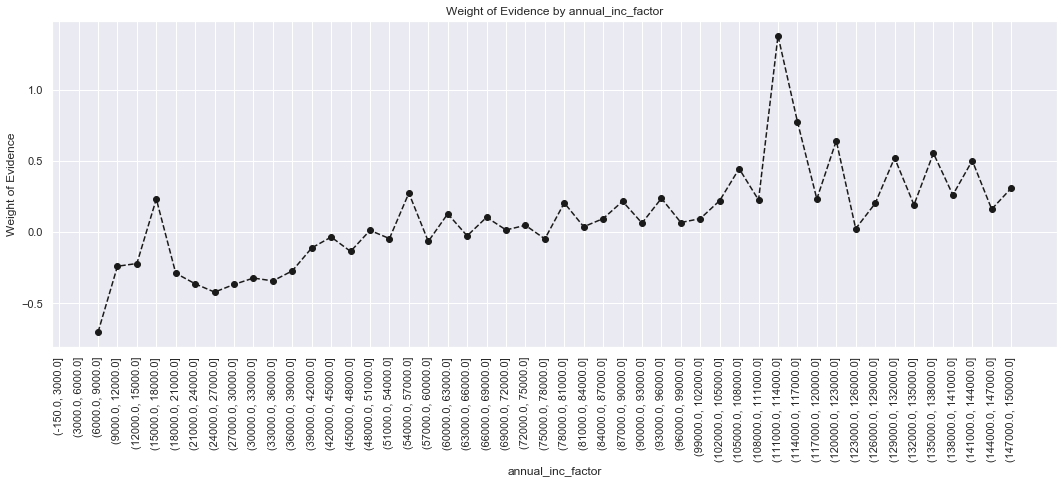

In [158]:
plot_by_woe(df_temp, 90)
# Similar to IR the WoE increases is function of the annual inc
#we can split the data into roughly equal interval

In [159]:
df_inputs_prep['annual_inc:<20K'] = np.where((df_inputs_prep['annual_inc'] <= 20000), 1, 0)
df_inputs_prep['annual_inc:20K-30K'] = np.where((df_inputs_prep['annual_inc'] > 20000) & (df_inputs_prep['annual_inc'] <= 30000), 1, 0)
df_inputs_prep['annual_inc:30K-40K'] = np.where((df_inputs_prep['annual_inc'] > 30000) & (df_inputs_prep['annual_inc'] <= 40000), 1, 0)
df_inputs_prep['annual_inc:40K-50K'] = np.where((df_inputs_prep['annual_inc'] > 40000) & (df_inputs_prep['annual_inc'] <= 50000), 1, 0)
df_inputs_prep['annual_inc:50K-60K'] = np.where((df_inputs_prep['annual_inc'] > 50000) & (df_inputs_prep['annual_inc'] <= 60000), 1, 0)
df_inputs_prep['annual_inc:60K-70K'] = np.where((df_inputs_prep['annual_inc'] > 60000) & (df_inputs_prep['annual_inc'] <= 70000), 1, 0)
df_inputs_prep['annual_inc:70K-80K'] = np.where((df_inputs_prep['annual_inc'] > 70000) & (df_inputs_prep['annual_inc'] <= 80000), 1, 0)
df_inputs_prep['annual_inc:80K-90K'] = np.where((df_inputs_prep['annual_inc'] > 80000) & (df_inputs_prep['annual_inc'] <= 90000), 1, 0)
df_inputs_prep['annual_inc:90K-100K'] = np.where((df_inputs_prep['annual_inc'] > 90000) & (df_inputs_prep['annual_inc'] <= 100000), 1, 0)
df_inputs_prep['annual_inc:100K-125K'] = np.where((df_inputs_prep['annual_inc'] > 100000) & (df_inputs_prep['annual_inc'] <= 125000), 1, 0)
df_inputs_prep['annual_inc:125K-150K'] = np.where((df_inputs_prep['annual_inc'] > 125000) & (df_inputs_prep['annual_inc'] <= 150000), 1, 0)
df_inputs_prep['annual_inc:>150K'] = np.where((df_inputs_prep['annual_inc'] > 150000), 1, 0)

In [160]:
#Mnths since last delinquincy
#a lot of missing value
#We are going to create a dummy for indicating that the original value of the colum is missing
#missing value dumm: 1= missing value; 0= value not missing 
df_inputs_prep_temp = df_inputs_prep[pd.notnull(df_inputs_prep['mths_since_last_delinq'])]#Toselect only the row with not missing values
df_inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'mths_since_last_delinq_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",7261,0.986503,0.033440,7163.0,98.0,0.033297,0.048756,-0.381359,NaN,NaN,inf
1,"(3.52, 7.04]",15763,0.990928,0.072596,15620.0,143.0,0.072610,0.071144,0.020388,0.004425,0.401746,inf
2,"(7.04, 10.56]",12365,0.992317,0.056947,12270.0,95.0,0.057037,0.047264,0.187960,0.001389,0.167573,inf
3,"(10.56, 14.08]",16125,0.990388,0.074263,15970.0,155.0,0.074237,0.077114,-0.038033,0.001929,0.225994,inf
4,"(14.08, 17.6]",11384,0.986472,0.052429,11230.0,154.0,0.052203,0.076617,-0.383684,0.003915,0.345651,inf
5,"(17.6, 21.12]",14291,0.990693,0.065817,14158.0,133.0,0.065814,0.066169,-0.005389,0.004221,0.378295,inf
6,"(21.12, 24.64]",10544,0.990800,0.048560,10447.0,97.0,0.048563,0.048259,0.006284,0.000107,0.011673,inf
7,"(24.64, 28.16]",13761,0.990916,0.063376,13636.0,125.0,0.063387,0.062189,0.019080,0.000116,0.012796,inf
8,"(28.16, 31.68]",9867,0.992804,0.045442,9796.0,71.0,0.045537,0.035323,0.253974,0.001888,0.234895,inf
9,"(31.68, 35.2]",12583,0.992053,0.057951,12483.0,100.0,0.058027,0.049751,0.153878,0.000752,0.100097,inf


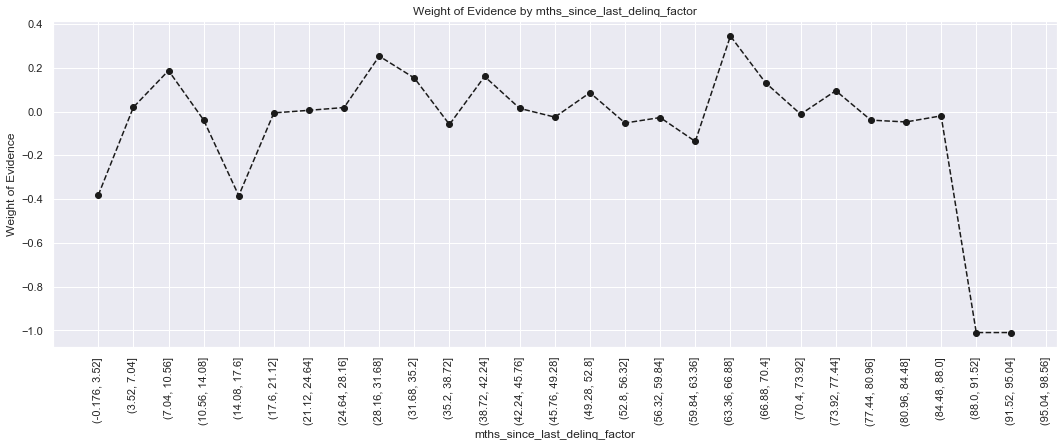

In [161]:
plot_by_woe(df_temp, 90)

In [162]:
df_inputs_prep['mths_since_last_delinq:Missing'] = np.where((df_inputs_prep['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_delinq:0-3'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 0) & (df_inputs_prep['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prep['mths_since_last_delinq:4-30'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 4) & (df_inputs_prep['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prep['mths_since_last_delinq:31-56'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 31) & (df_inputs_prep['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prep['mths_since_last_delinq:>=57'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 57), 1, 0)

In [163]:
#dti factor
df_inputs_prep['dti_factor'] = pd.cut(df_inputs_prep['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prep, 'dti_factor', df_targets_prep)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9.999, 99.99]",421083,0.99071,0.999974,417171.0,3912.0,0.999974,1.0,-0.000026,NaN,NaN,inf
1,"(99.99, 199.98]",6,1.00000,0.000014,6.0,0.0,0.000014,0.0,inf,0.00929,inf,inf
2,"(199.98, 299.97]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(299.97, 399.96]",1,1.00000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,NaN,inf
4,"(399.96, 499.95]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(499.95, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(599.94, 699.93]",1,1.00000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,NaN,inf
7,"(699.93, 799.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(799.92, 899.91]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(899.91, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


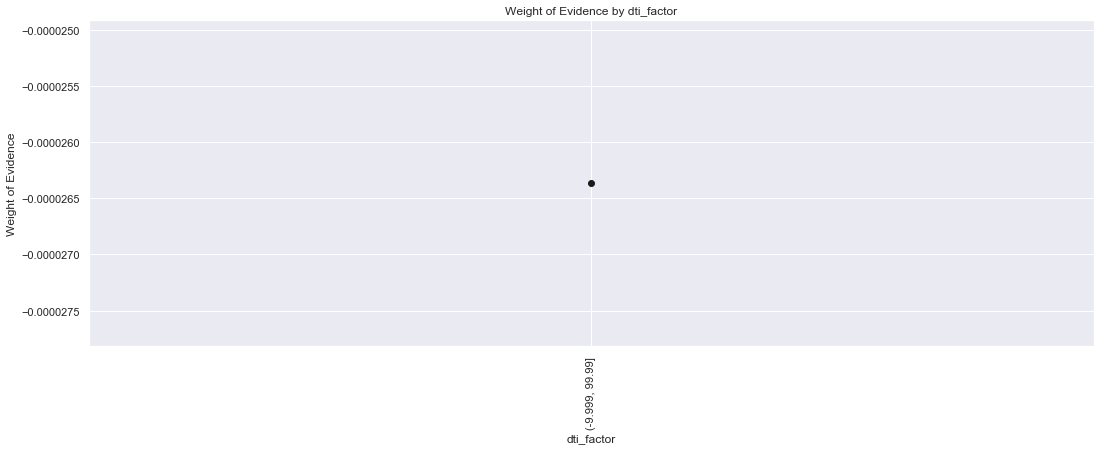

In [164]:
plot_by_woe(df_temp, 90)

In [165]:
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['dti'] <= 35, : ]

In [166]:
df_inputs_prep_temp['dti_factor'] = pd.cut(df_inputs_prep_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'dti_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",707,0.983027,0.001749,695.0,12.0,0.001735,0.003272,-0.634345,NaN,NaN,0.050453
1,"(0.7, 1.4]",1116,0.986559,0.002761,1101.0,15.0,0.002749,0.004091,-0.397426,0.003532,0.236919,0.050453
2,"(1.4, 2.1]",1596,0.992481,0.003949,1584.0,12.0,0.003955,0.003272,0.189452,0.005922,0.586878,0.050453
3,"(2.1, 2.8]",2140,0.992056,0.005295,2123.0,17.0,0.005301,0.004636,0.134022,0.000425,0.055430,0.050453
4,"(2.8, 3.5]",2873,0.987818,0.007108,2838.0,35.0,0.007086,0.009545,-0.297843,0.004238,0.431865,0.050453
5,"(3.5, 4.2]",3342,0.994016,0.008269,3322.0,20.0,0.008295,0.005454,0.419240,0.006198,0.717083,0.050453
6,"(4.2, 4.9]",3963,0.991673,0.009805,3930.0,33.0,0.009813,0.008999,0.086537,0.002343,0.332703,0.050453
7,"(4.9, 5.6]",4945,0.993933,0.012235,4915.0,30.0,0.012272,0.008181,0.405500,0.002260,0.318963,0.050453
8,"(5.6, 6.3]",5600,0.992321,0.013856,5557.0,43.0,0.013875,0.011726,0.168264,0.001612,0.237236,0.050453
9,"(6.3, 7.0]",6101,0.993280,0.015095,6060.0,41.0,0.015131,0.011181,0.302543,0.000958,0.134279,0.050453


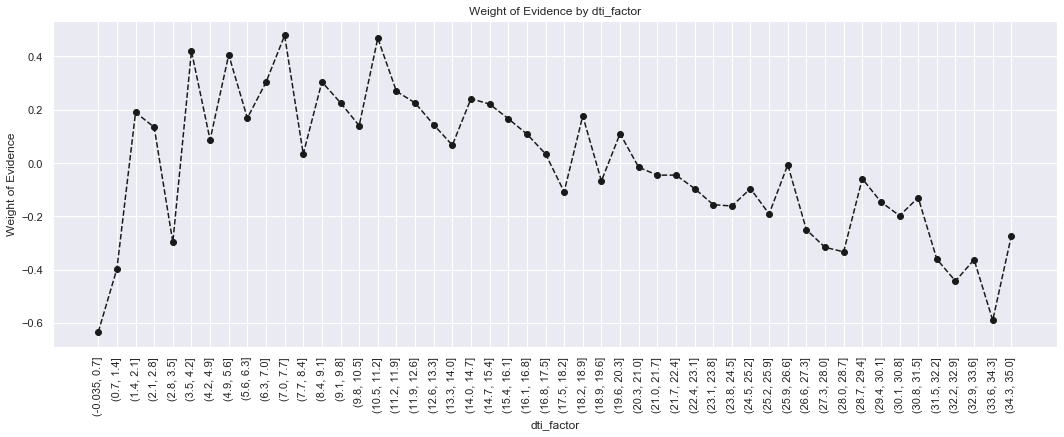

In [167]:
plot_by_woe(df_temp, 90)

In [168]:
df_inputs_prep['dti:<=1.4'] = np.where((df_inputs_prep['dti'] <= 1.4), 1, 0)
df_inputs_prep['dti:1.4-3.5'] = np.where((df_inputs_prep['dti'] > 1.4) & (df_inputs_prep['dti'] <= 3.5), 1, 0)
df_inputs_prep['dti:3.5-7.7'] = np.where((df_inputs_prep['dti'] > 3.5) & (df_inputs_prep['dti'] <= 7.7), 1, 0)
df_inputs_prep['dti:7.7-10.5'] = np.where((df_inputs_prep['dti'] > 7.7) & (df_inputs_prep['dti'] <= 10.5), 1, 0)
df_inputs_prep['dti:10.5-16.1'] = np.where((df_inputs_prep['dti'] > 10.5) & (df_inputs_prep['dti'] <= 16.1), 1, 0)
df_inputs_prep['dti:16.1-20.3'] = np.where((df_inputs_prep['dti'] > 16.1) & (df_inputs_prep['dti'] <= 20.3), 1, 0)
df_inputs_prep['dti:20.3-21.7'] = np.where((df_inputs_prep['dti'] > 20.3) & (df_inputs_prep['dti'] <= 21.7), 1, 0)
df_inputs_prep['dti:21.7-22.4'] = np.where((df_inputs_prep['dti'] > 21.7) & (df_inputs_prep['dti'] <= 22.4), 1, 0)
df_inputs_prep['dti:22.4-35'] = np.where((df_inputs_prep['dti'] > 22.4) & (df_inputs_prep['dti'] <= 35), 1, 0)
df_inputs_prep['dti:>35'] = np.where((df_inputs_prep['dti'] > 35), 1, 0)

In [169]:
df_inputs_prep_temp = df_inputs_prep[pd.notnull(df_inputs_prep['mths_since_last_record'])]
df_inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'mths_since_last_record_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.12, 2.4]",87,1.000000,0.001169,87.0,0.0,0.001181,0.000000,inf,NaN,NaN,inf
1,"(2.4, 4.8]",161,1.000000,0.002164,161.0,0.0,0.002185,0.000000,inf,0.000000,NaN,inf
2,"(4.8, 7.2]",344,0.985465,0.004623,339.0,5.0,0.004600,0.006897,-0.404889,0.014535,inf,inf
3,"(7.2, 9.6]",291,0.989691,0.003911,288.0,3.0,0.003908,0.004138,-0.057103,0.004226,0.347786,inf
4,"(9.6, 12.0]",537,0.992551,0.007216,533.0,4.0,0.007233,0.005517,0.270776,0.002860,0.327879,inf
5,"(12.0, 14.4]",404,0.992574,0.005429,401.0,3.0,0.005442,0.004138,0.273898,0.000023,0.003122,inf
6,"(14.4, 16.8]",410,0.987805,0.005510,405.0,5.0,0.005496,0.006897,-0.227002,0.004769,0.500900,inf
7,"(16.8, 19.2]",693,0.991342,0.009313,687.0,6.0,0.009323,0.008276,0.119124,0.003537,0.346126,inf
8,"(19.2, 21.6]",521,0.988484,0.007001,515.0,6.0,0.006989,0.008276,-0.169043,0.002858,0.288167,inf
9,"(21.6, 24.0]",825,0.991515,0.011086,818.0,7.0,0.011101,0.009655,0.139501,0.003031,0.308545,inf


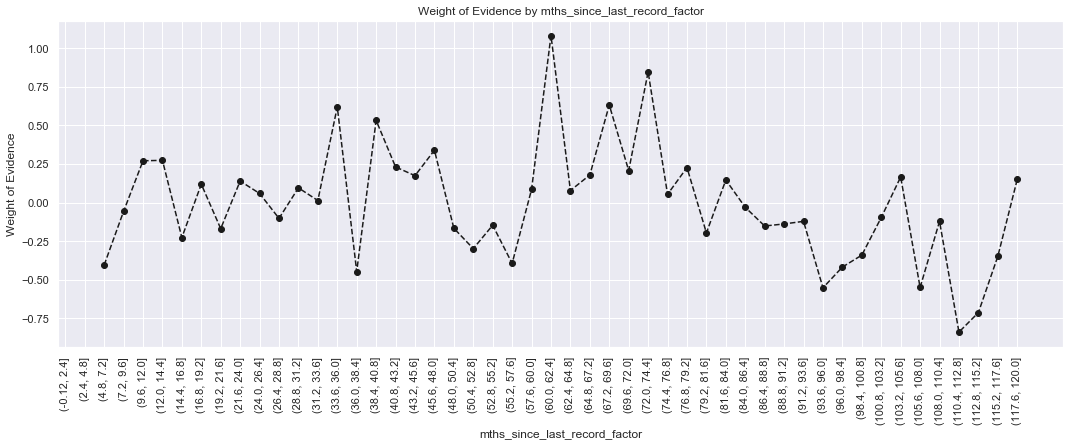

In [170]:
plot_by_woe(df_temp, 90)

In [171]:
df_inputs_prep['mths_since_last_record:Missing'] = np.where((df_inputs_prep['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_record:0-2'] = np.where((df_inputs_prep['mths_since_last_record'] >= 0) & (df_inputs_prep['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prep['mths_since_last_record:3-20'] = np.where((df_inputs_prep['mths_since_last_record'] >= 3) & (df_inputs_prep['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prep['mths_since_last_record:21-31'] = np.where((df_inputs_prep['mths_since_last_record'] >= 21) & (df_inputs_prep['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prep['mths_since_last_record:32-80'] = np.where((df_inputs_prep['mths_since_last_record'] >= 32) & (df_inputs_prep['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prep['mths_since_last_record:81-86'] = np.where((df_inputs_prep['mths_since_last_record'] >= 81) & (df_inputs_prep['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prep['mths_since_last_record:>=86'] = np.where((df_inputs_prep['mths_since_last_record'] >= 86), 1, 0)

In [172]:
#Contains the train and test data set with all dummies variables
#loan_data_inputs_train = df_inputs_prep
#loan_data_inputs_test = df_inputs_prep
loan_data_inputs_2015 = df_inputs_prep
loan_data_targets_2015 = df_targets_prep

In [173]:
print(loan_data_inputs_2015.shape)
print(loan_data_targets_2015.shape)

(421094, 318)
(421094,)


In [174]:
#To save the data as csv file
path = r'D:\DataBases\DataSets\Credit_Risk_Modeling'
loan_data_inputs_2015.to_csv(path + "/loan_data_inputs_2015.csv")
loan_data_targets_2015.to_csv(path + "/loan_data_targets_2015.csv")

**TO LOAD DATA**

In [56]:
path = r'D:\DataBases\DataSets\Credit_Risk_Modeling'
loan_data_inputs_2015 = pd.read_csv(path + "/loan_data_inputs_2015.csv")
#loan_data_targets_2015 = pd.read_csv(path + "/loan_data_targets_2015.csv")

**WE SELECT ONLY DUMMIES THAT WERE USED IN THE PD MODEL**

In [57]:
inputs_train_with_ref_cat = pd.read_csv(path + "/inputs_train_with_ref_cat.csv")
print(inputs_train_with_ref_cat.shape)

(373028, 88)


In [11]:
#inputs_train_with_ref_cat.to_csv(path + "/inputs_train_with_ref_cat.csv", index=False)

In [ ]:
#We select only the significant variables
#According to the p-value the variables delinq_2yrs, open_acc, acc_now_delinq,
#total_acc,total_rev_hi_lim,mths_since_last_delinq, mths_since_last_record, will not be included in the model  

In [58]:
inputs_2015_with_ref_cat = loan_data_inputs_2015[['grade:A', 
                                                           'grade:B', 
                                                           'grade:C', 
                                                           'grade:D', 
                                                           'grade:E', 
                                                           'grade:F', 
                                                           'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE',
                                                           'home_ownership:MORTGAGE',
                                                           'home_ownership:OWN',
                                                           'addr_state:NY',
                                                           'addr_state:TX',
                                                           'addr_state:CA',
                                                           'addr_state:ND_NE_IA_NV_FL_AL_HI', 
                                                           'addr_state:MO_MD',
                                                           'addr_state:LA_NC_NJ_NM_UT',
                                                           'addr_state:KY_MI_DE_VA',
                                                           'addr_state:MN_PA_AZ_AR_WA_TN_OK', 
                                                           'addr_state:OH_RI_IN_GA_MA_OR_WI',
                                                           'addr_state:SD_IL',
                                                           'addr_state:KS_CT', 
                                                           'addr_state:CO_MS_SC_AK_VT_MT',
                                                           'addr_state:WV_NH_WY_DC_ME_ID',
                                                           'verification_status:Not Verified', 
                                                           'verification_status:Source Verified',
                                                           'verification_status:Verified',
                                                           'purpose:edu_smbus_ren_mov',
                                                           'purpose:other_vac_med_wedd_hse', 
                                                           'purpose:car_home_imp_mjpurchase',
                                                           'purpose:credit_card', 
                                                           'purpose:debt_consolidation',
                                                           'initial_list_status:f', 
                                                           'initial_list_status:w',
                                                           'term:36', 
                                                           'term:60', 
                                                           'emp_length:0', 
                                                           'emp_length:1', 
                                                           'emp_length:2-4',
                                                           'emp_length:5-6', 
                                                           'emp_length:7-9',
                                                           'emp_length:10',
                                                           'mths_since_issue_date:<50',
                                                           'mths_since_issue_date:50-51', 
                                                           'mths_since_issue_date:52-53',
                                                           'mths_since_issue_date:54-60', 
                                                           'mths_since_issue_date:61-64',
                                                           'mths_since_issue_date:65-76', 
                                                           'mths_since_issue_date:77-96',
                                                           'mths_since_issue_date:>96',
                                                           'int_rate:<9.548',
                                                           'int_rate:9.548-12.025',
                                                           'int_rate:12.025-15.74', 
                                                           'int_rate:15.74-20.281', 
                                                           'int_rate:>20.281',
                                                           'mths_since_earliest_cr_line:<144',
                                                           'mths_since_earliest_cr_line:144-167',
                                                           'mths_since_earliest_cr_line:168-239',
                                                           'mths_since_earliest_cr_line:240-275',
                                                           'mths_since_earliest_cr_line:276-371', 
                                                           'mths_since_earliest_cr_line:>371',
                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-2',
                                                           'inq_last_6mths:3-5', 
                                                           'inq_last_6mths:>5',
                                                           'pub_rec:0',
                                                           'pub_rec:>=1',
                                                           'annual_inc:<20K', 
                                                           'annual_inc:20K-30K', 
                                                           'annual_inc:30K-40K',
                                                           'annual_inc:40K-50K', 
                                                           'annual_inc:50K-60K', 
                                                           'annual_inc:60K-70K',
                                                           'annual_inc:70K-80K', 
                                                           'annual_inc:80K-90K', 
                                                           'annual_inc:90K-100K',
                                                           'annual_inc:100K-125K', 
                                                           'annual_inc:125K-150K', 
                                                           'annual_inc:>150K',
                                                           'dti:<=1.4', 
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7', 
                                                           'dti:7.7-10.5', 
                                                           'dti:10.5-16.1', 
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7', 
                                                           'dti:21.7-22.4', 
                                                           'dti:22.4-35', 
                                                           'dti:>35']]

In [6]:
ref_categories = ["grade:G",
"home_ownership:RENT_OTHER_NONE",
"addr_state:ND_NE_IA_NV_FL_AL_HI",
"verification_status:Verified",
"purpose:edu_smbus_ren_mov",
"initial_list_status:f",
"term:60",
"emp_length:0",
"mths_since_issue_date:>96",
"int_rate:>20.281",
"mths_since_earliest_cr_line:<144",
"inq_last_6mths:>5",
"pub_rec:0",
"annual_inc:<20K",
"dti:>35"]

In [59]:
print(inputs_train_with_ref_cat.shape)
print(inputs_2015_with_ref_cat.shape)

(373028, 88)
(421094, 88)


In [178]:
#To find out how the columns of two data set differ
#set(inputs_train_with_ref_cat.columns) - set(inputs_2015_with_ref_cat.columns)

{'Unnamed: 0'}

In [60]:
# We import the scorecard.
df_scorecard = pd.read_csv(path + '/df_scorecard.csv')

In [61]:
df_scorecard.head()

,index,Features_name,Coefficients,Original_Features_name,score_calculation,score_preliminary,diffrence,score_final
0,0,Intercept,-1.285283,Intercept,303.738674,304,0.261326,304
1,1,grade:A,1.015265,grade,79.307576,79,-0.307576,79
2,2,grade:B,0.903458,grade,70.573809,71,0.426191,71
3,3,grade:C,0.693160,grade,54.146339,54,-0.146339,54
4,4,grade:D,0.518789,grade,40.525299,41,0.474701,41


In [62]:
#We want to multiply dummies variables of each dataframe by the scores from the scorecard  
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Features_name'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_train_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_AL_HI,verification_status:Verified,purpose:edu_smbus_ren_mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>96,int_rate:>20.281,mths_since_earliest_cr_line:<144,inq_last_6mths:>5,pub_rec:0,annual_inc:<20K,dti:>35
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [63]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Features_name'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_AL_HI,verification_status:Verified,purpose:edu_smbus_ren_mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>96,int_rate:>20.281,mths_since_earliest_cr_line:<144,inq_last_6mths:>5,pub_rec:0,annual_inc:<20K,dti:>35
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [64]:
scorecard_scores = df_scorecard['score_final']
scorecard_scores = scorecard_scores.values.reshape(89, 1)

In [65]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_train.head()

,0
0,571
1,592
2,541
3,594
4,620


In [66]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_2015.head()

,0
0,770
1,790
2,657
3,660
4,735


In [67]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)
# Here we concatenate the scores we calculated with the rest of the variables in the two dataframes:
# the one with old ("expected") data and the one with new ("actual") data.

inputs_2015_with_ref_cat_w_intercept.head()
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_AL_HI,verification_status:Verified,purpose:edu_smbus_ren_mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>96,int_rate:>20.281,mths_since_earliest_cr_line:<144,inq_last_6mths:>5,pub_rec:0,annual_inc:<20K,dti:>35,0
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,770
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,790
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,657
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,660
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,735


In [68]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
# Here we rename the columns containing scores to "Score" in both dataframes.

In [69]:
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_AL_HI,verification_status:Verified,purpose:edu_smbus_ren_mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>96,int_rate:>20.281,mths_since_earliest_cr_line:<144,inq_last_6mths:>5,pub_rec:0,annual_inc:<20K,dti:>35,Score
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,770
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,790
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,657
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,660
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,735


In [70]:
print(inputs_2015_with_ref_cat_w_intercept.shape)
print(inputs_train_with_ref_cat_w_intercept.shape)

(421094, 90)
(373028, 90)


In [75]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [83]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 300) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 350) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 400) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 450) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 500) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 550) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 600) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 650) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 700) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 750) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] >= 800) & (inputs_2015_with_ref_cat_w_intercept.iloc[:,-1] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

In [84]:
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_AL_HI,verification_status:Verified,purpose:edu_smbus_ren_mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>96,int_rate:>20.281,mths_since_earliest_cr_line:<144,inq_last_6mths:>5,pub_rec:0,annual_inc:<20K,dti:>35,Score,Score:300-350,Score:350-400,Score:400-450,Score:450-500,Score:500-550,Score:550-600,Score:600-650,Score:650-700,Score:700-750,Score:750-800,Score:800-850
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,770,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,790,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,657,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,660,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,735,0,0,0,0,0,0,0,0,0,0,0


# PSI CALCULATION

In [85]:
PSI_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.

In [86]:
PSI_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.

In [87]:
PSI = pd.concat([PSI_train, PSI_2015], axis = 1)
# We concatenate the two dataframes along the columns.

In [88]:
PSI = PSI.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.
# The old index, which is the dummy variable name, becomes a column, named 'index'.
PSI['Original_features_name'] = PSI['index'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
PSI.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original_features_name']
# We change the names of the columns of the dataframe.

In [89]:
PSI = PSI[np.array(['index', 'Original_features_name', 'Proportions_Train', 'Proportions_New'])]

In [90]:
PSI

,index,Original_features_name,Proportions_Train,Proportions_New
0,Intercept,Intercept,1.000000,1.000000
1,grade:A,grade,0.160932,0.174154
2,grade:B,grade,0.293005,0.279287
3,grade:C,grade,0.268781,0.286318
4,grade:D,grade,0.164996,0.148789
...,...,...,...,...
96,Score:600-650,Score,0.260482,0.000000
97,Score:650-700,Score,0.145300,0.000000
98,Score:700-750,Score,0.067622,0.000000
99,Score:750-800,Score,0.016310,0.000000


In [91]:
#We have redundant rows Intercept and Score we dont need them for PSI calculation
PSI = PSI[(PSI['index'] != 'Intercept') & (PSI['index'] != 'Score')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.

In [92]:
PSI['Contribution'] = np.where((PSI['Proportions_Train'] == 0) \
                                    | (PSI['Proportions_New'] == 0), 0,\
                                    (PSI['Proportions_New'] - PSI['Proportions_Train']) \
                                    * np.log(PSI['Proportions_New'] / PSI['Proportions_Train']))
# We calculate the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

In [93]:
PSI

,index,Original_features_name,Proportions_Train,Proportions_New,Contribution
1,grade:A,grade,0.160932,0.174154,1.043970e-03
2,grade:B,grade,0.293005,0.279287,6.577755e-04
3,grade:C,grade,0.268781,0.286318,1.108452e-03
4,grade:D,grade,0.164996,0.148789,1.675684e-03
5,grade:E,grade,0.076809,0.082993,4.788681e-04
6,grade:F,grade,0.028467,0.023313,1.029408e-03
7,home_ownership:MORTGAGE,home_ownership,0.506050,0.493196,3.307278e-04
8,home_ownership:OWN,home_ownership,0.089564,0.108684,3.699261e-03
9,addr_state:NY,addr_state,0.086331,0.080372,4.263078e-04
10,addr_state:TX,addr_state,0.078190,0.082402,2.210149e-04


In [95]:
PSI.groupby('Original_features_name')['Contribution'].sum()
# Finally, we sum all contributions for each original independent variable and the 'Score' variable.

Original_features_name
Score                          0.000000
addr_state                     0.003137
annual_inc                     0.005354
dti                            0.078275
emp_length                     0.007748
grade                          0.006570
home_ownership                 0.004128
initial_list_status            0.332737
inq_last_6mths                 0.056233
int_rate                       0.079257
mths_since_earliest_cr_line    0.033781
mths_since_issue_date          0.305527
pub_rec                        0.015669
purpose                        0.008139
term                           0.013008
verification_status            0.048269
Name: Contribution, dtype: float64

**INTERPRETATION**

Values of PSI
.PSI=0: No Differences
.PSI<0.1 : Little to no difference
.0.1<PSI<0.25:Little difference (no action is required)
.PSI>0.25: Big diffrence(action required)
.PSI=1:Absolute difference 

Based on the preceeding,
The ind variables addr_state, annual_inc, dti, emp_length, grade, home_ownership have a PSI lower than 0.1. It means there are only minor difference between the population data the model was tarined with the population of new borrowers with respect to any of these features.

initial_list_status has a PSI of 0.33>0.25 It imples big differences between the populations of new applicants with the original population. By having a closer look at the proportion of borrowers falling into the #t categories of initial status. 0.350282 (35%) fall in the category initial_list_status:w(refering to people that hold loans) and about 0.649718 (64%) fall in the category initial_list_status:f(fractional shares loans) in the population the model was trained on whereas in the new population, there are about 0.634659(63%) in the initial_list_status:w category and 0.365341(36%) fall in the initial_list_status:f category. 

mths_since_issue_date has a PSI of 0.305527. It implies that  

Score reflects how the two populations are distributed with respect to the dependent variable or the estimated prob of non default. Score has a PSI of 00, It implies no major difference between the two pop with respect to the outcomes obtained by the model.

Th new pop differ from the original by 2 viables of the 15 independant variables and the outcomes of the pd model. For both independent variables, the  difference may not be due to the changes in the characteristics of the borrowers themselves. If we decide to change the model based only on these informations, we can expect a considerable change of the coefficients of these two features but not the rest.

We also found that the population do not differ with respect to the estimated credit score. It implies that our model outputs are not considerably different than those before. It implies than we dont need to train the whole model again by including the new population in the training data set.    